# PRML Project - Traffic Prediction

    - Ayush Abrol B20AI052
    - Aryan Tiwari B20AI056
    - Neehal Prakash Bajaj B20AI0
    
---    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time
import datetime
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('traffic.csv')
df

DateTime  Junction  Vehicles           ID
0      2015-11-01 00:00:00         1        15  20151101001
1      2015-11-01 01:00:00         1        13  20151101011
2      2015-11-01 02:00:00         1        10  20151101021
3      2015-11-01 03:00:00         1         7  20151101031
4      2015-11-01 04:00:00         1         9  20151101041
...                    ...       ...       ...          ...
48115  2017-06-30 19:00:00         4        11  20170630194
48116  2017-06-30 20:00:00         4        30  20170630204
48117  2017-06-30 21:00:00         4        16  20170630214
48118  2017-06-30 22:00:00         4        22  20170630224
48119  2017-06-30 23:00:00         4        12  20170630234

[48120 rows x 4 columns]

In [4]:
df.drop(['ID'], axis=1, inplace=True)

In [5]:
df.describe()

Junction      Vehicles
count  48120.000000  48120.000000
mean       2.180549     22.791334
std        0.966955     20.750063
min        1.000000      1.000000
25%        1.000000      9.000000
50%        2.000000     15.000000
75%        3.000000     29.000000
max        4.000000    180.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [7]:
df

DateTime  Junction  Vehicles
0      2015-11-01 00:00:00         1        15
1      2015-11-01 01:00:00         1        13
2      2015-11-01 02:00:00         1        10
3      2015-11-01 03:00:00         1         7
4      2015-11-01 04:00:00         1         9
...                    ...       ...       ...
48115  2017-06-30 19:00:00         4        11
48116  2017-06-30 20:00:00         4        30
48117  2017-06-30 21:00:00         4        16
48118  2017-06-30 22:00:00         4        22
48119  2017-06-30 23:00:00         4        12

[48120 rows x 3 columns]

In [8]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 MB


In [10]:
df_new = df.copy()

In [11]:
df_new['Year'] = df_new['DateTime'].dt.year
df_new['Month'] = df_new['DateTime'].dt.month
df_new['Date'] = df_new['DateTime'].dt.day
df_new['Hour'] = df_new['DateTime'].dt.hour
df_new['Day'] = df_new.DateTime.dt.strftime('%A')

In [12]:
df_new

DateTime  Junction  Vehicles  Year  Month  Date  Hour     Day
0     2015-11-01 00:00:00         1        15  2015     11     1     0  Sunday
1     2015-11-01 01:00:00         1        13  2015     11     1     1  Sunday
2     2015-11-01 02:00:00         1        10  2015     11     1     2  Sunday
3     2015-11-01 03:00:00         1         7  2015     11     1     3  Sunday
4     2015-11-01 04:00:00         1         9  2015     11     1     4  Sunday
...                   ...       ...       ...   ...    ...   ...   ...     ...
48115 2017-06-30 19:00:00         4        11  2017      6    30    19  Friday
48116 2017-06-30 20:00:00         4        30  2017      6    30    20  Friday
48117 2017-06-30 21:00:00         4        16  2017      6    30    21  Friday
48118 2017-06-30 22:00:00         4        22  2017      6    30    22  Friday
48119 2017-06-30 23:00:00         4        12  2017      6    30    23  Friday

[48120 rows x 8 columns]

Text(0, 0.5, 'Number of Vehicles')

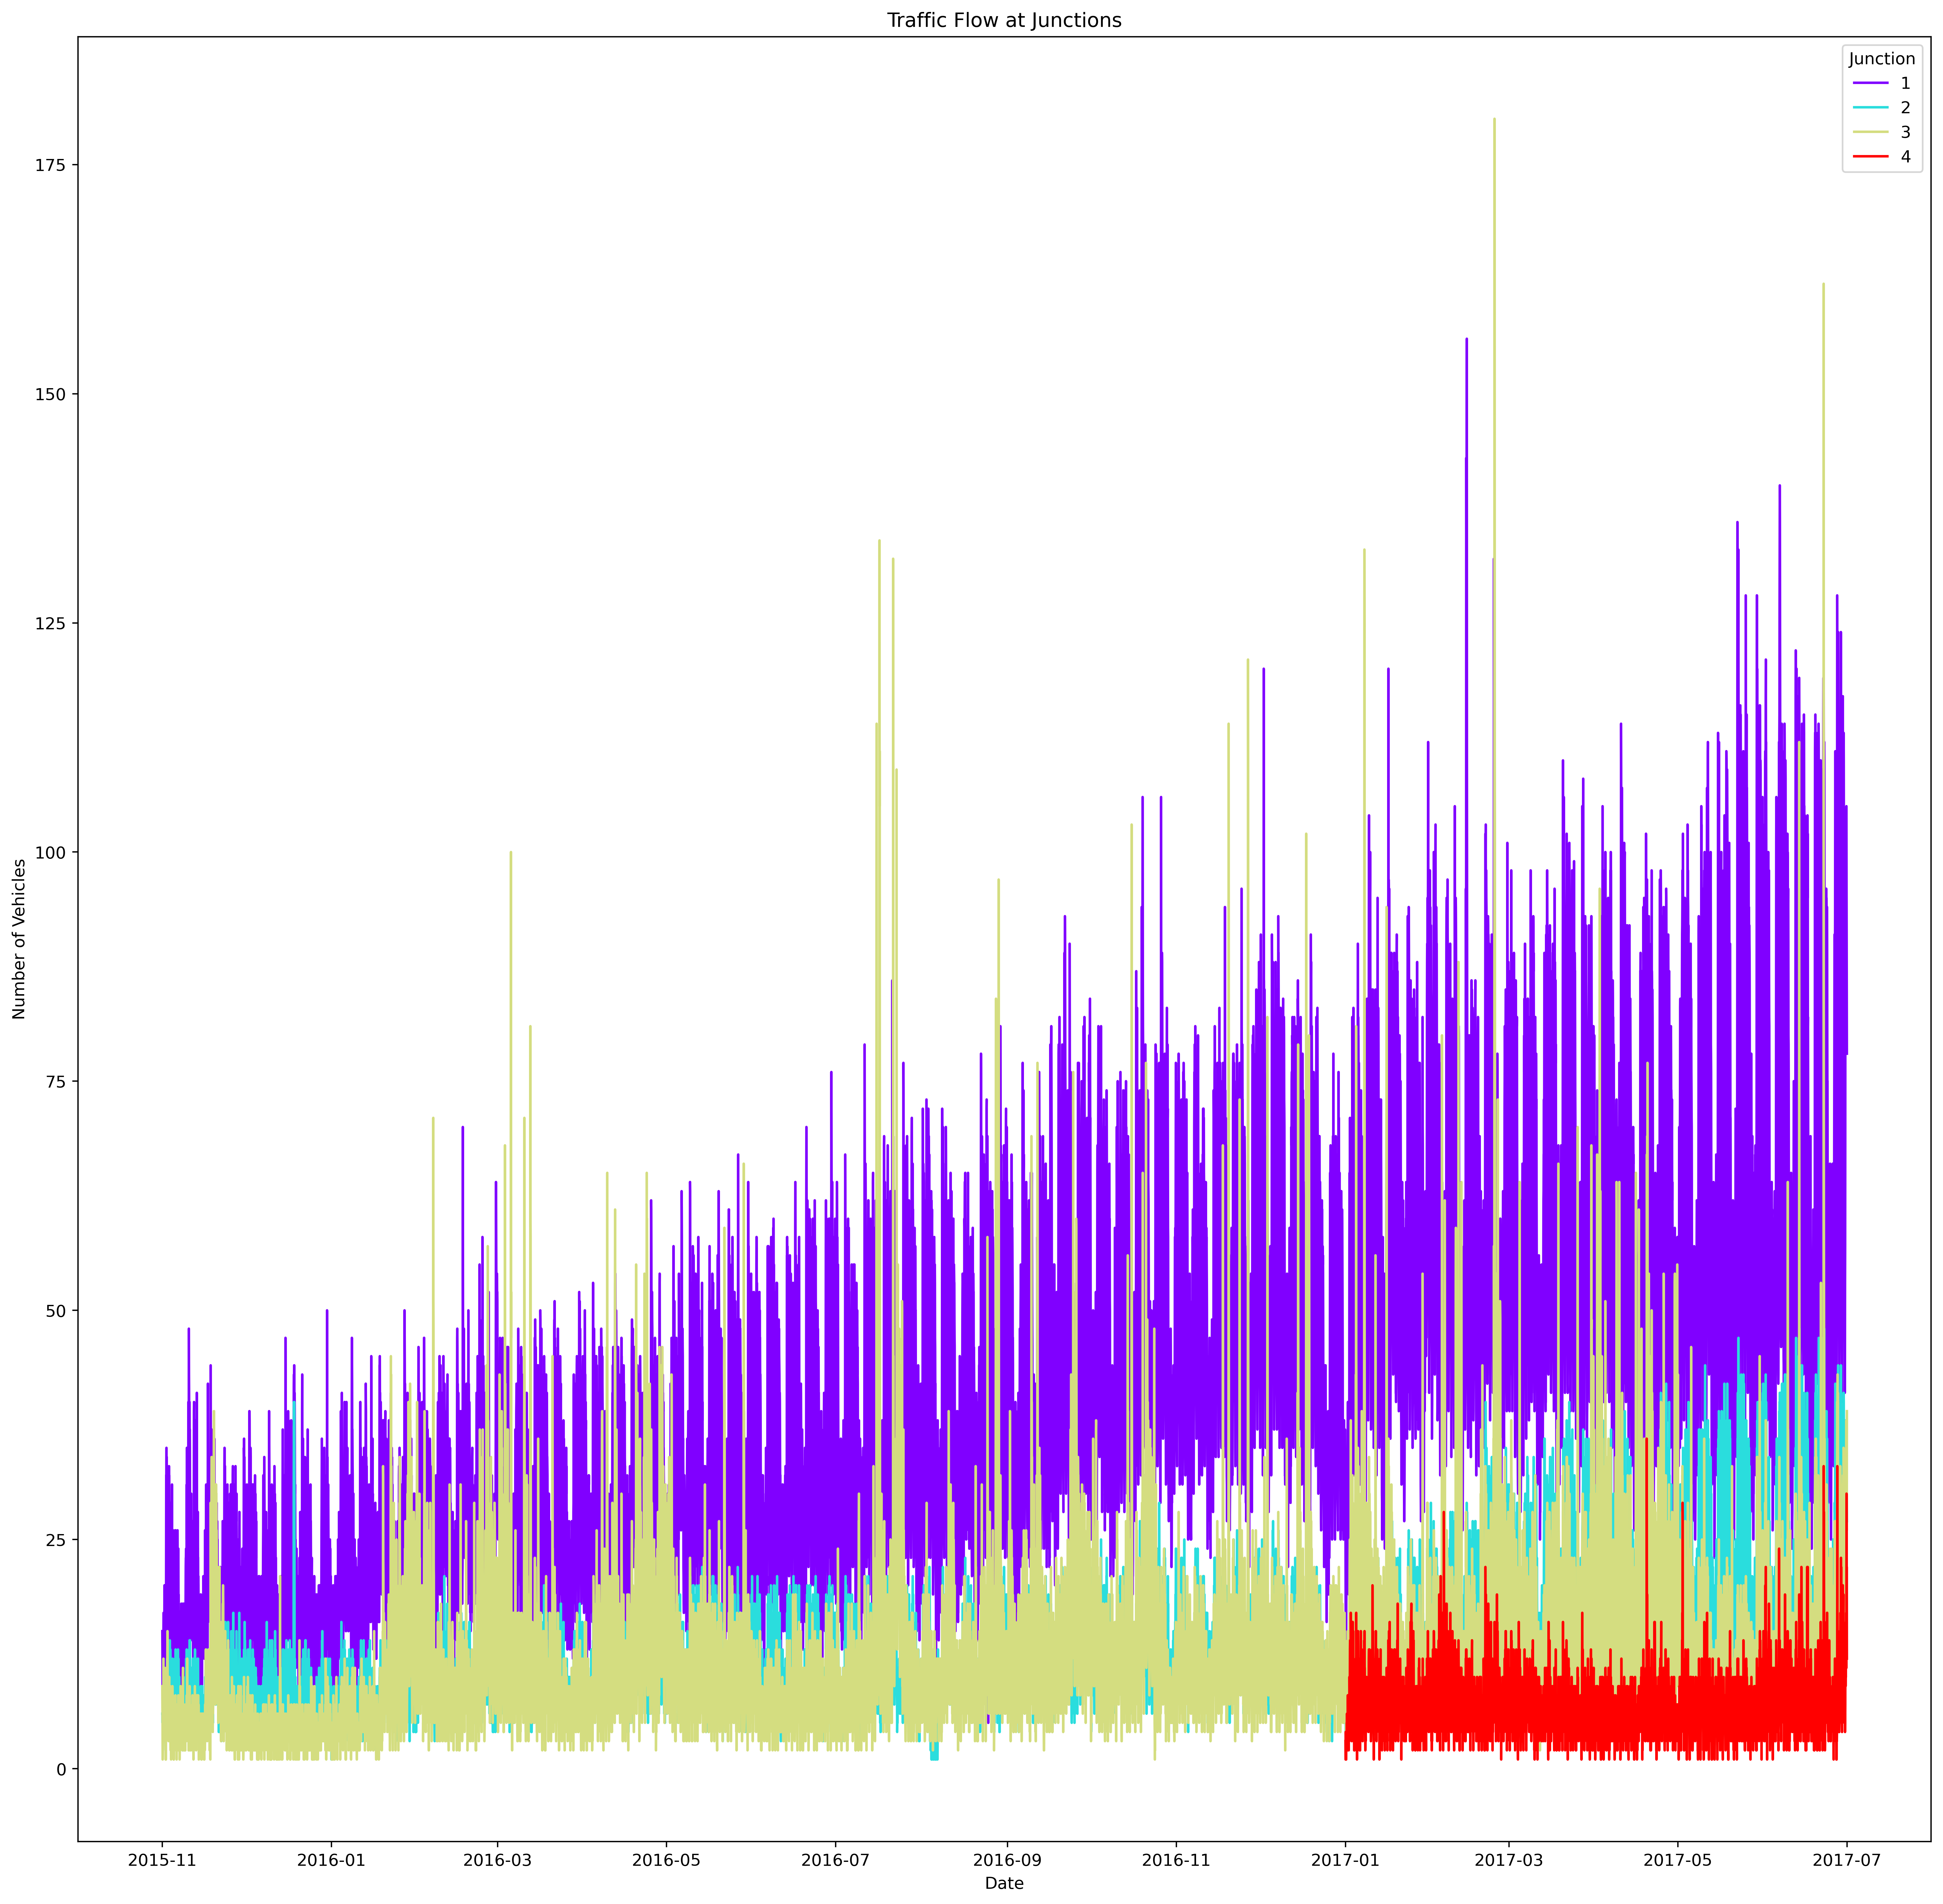

In [13]:
# Visualizing the dataset

plt.figure(figsize=(20, 20), dpi = 400)
plot = sns.lineplot(x = df['DateTime'], y = "Vehicles", data = df, hue="Junction", palette="rainbow")
plot.set_title('Traffic Flow at Junctions')
plot.set_xlabel('Date')
plot.set_ylabel('Number of Vehicles')

<Figure size 8000x8000 with 0 Axes>

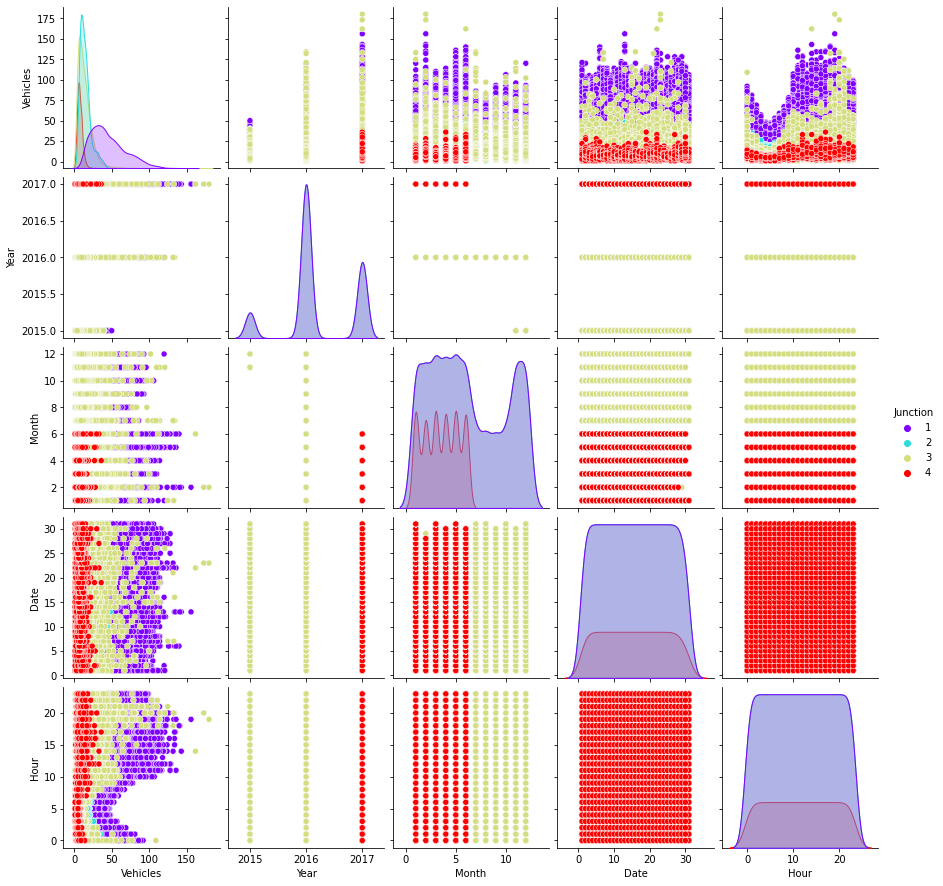

In [14]:
plt.figure(figsize=(20, 20), dpi = 400)
sns.pairplot(df_new, hue="Junction", palette="rainbow")

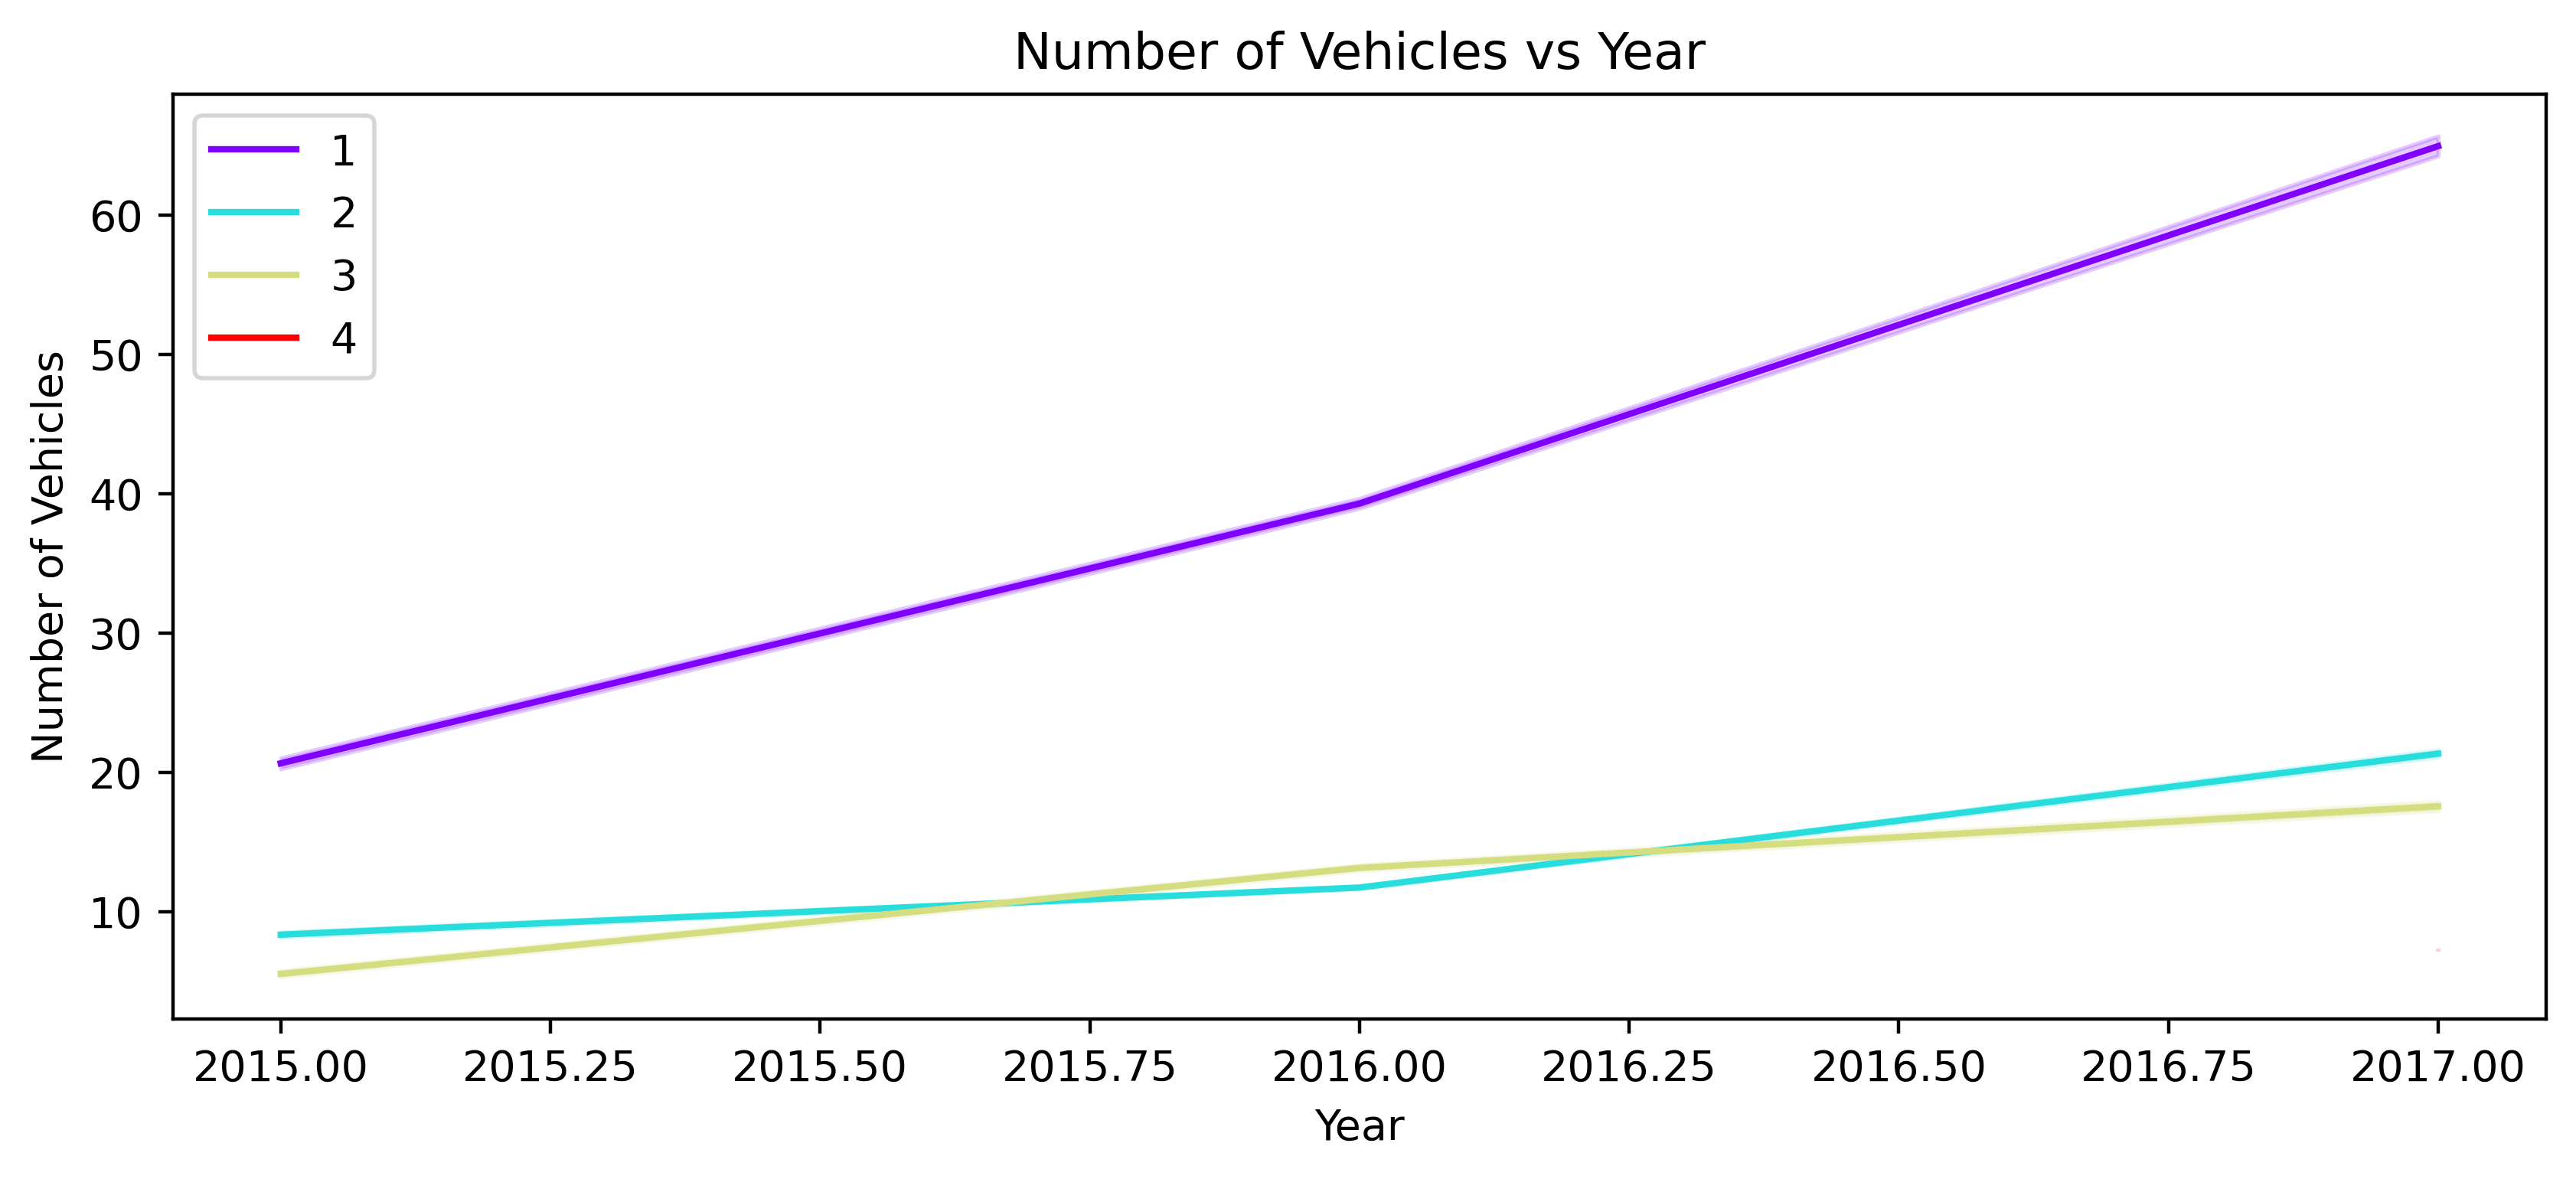

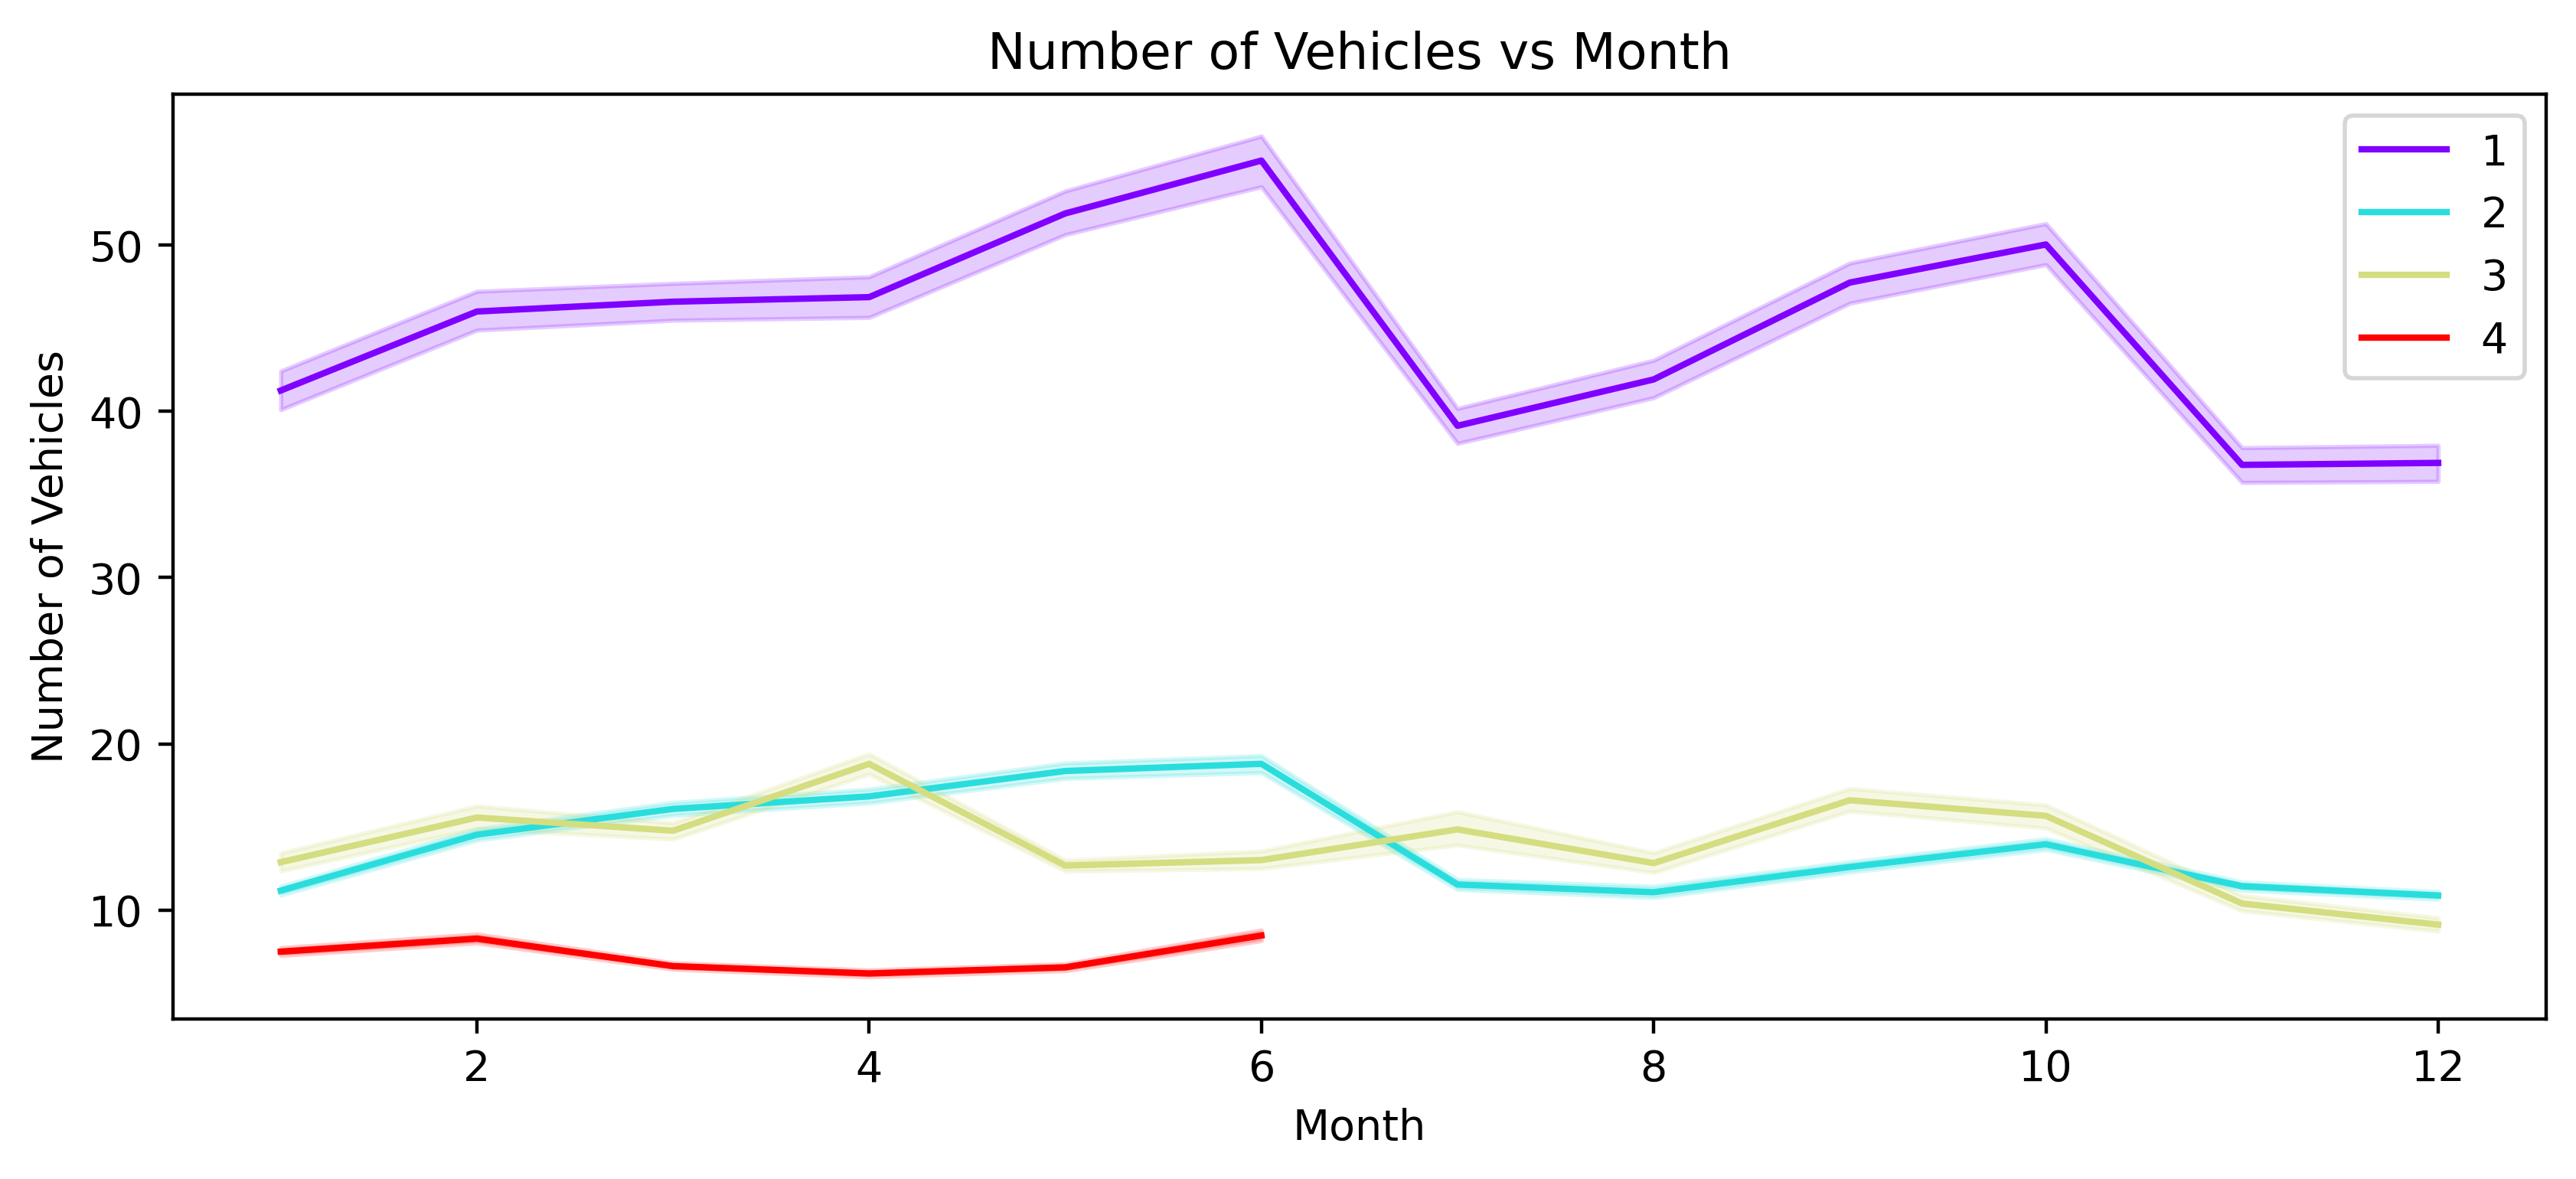

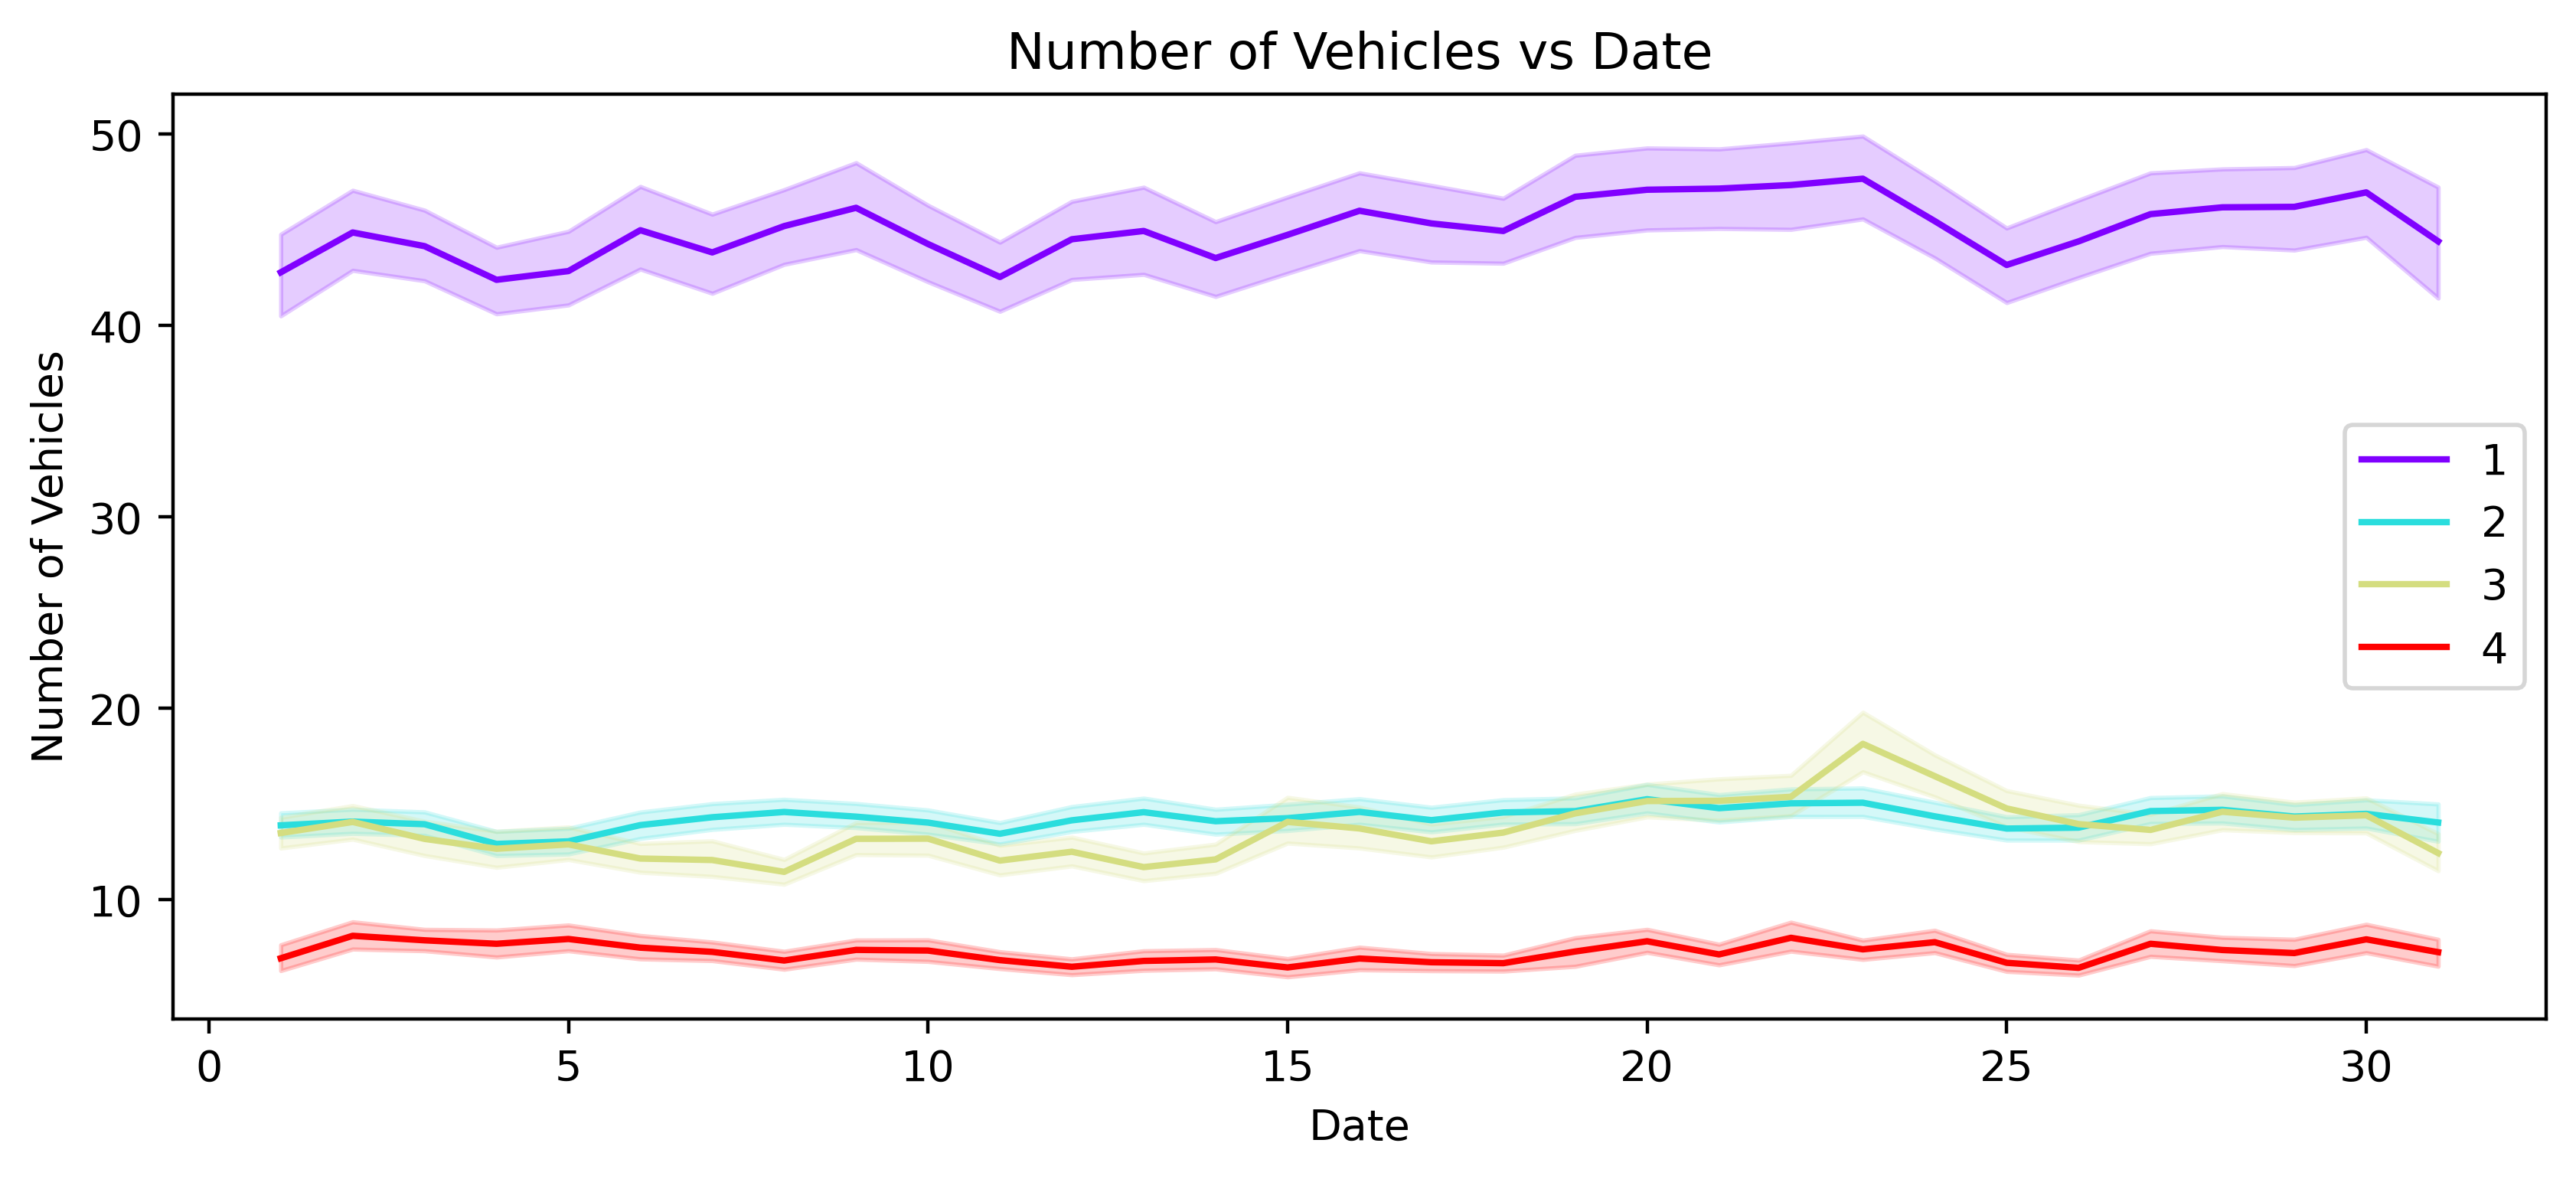

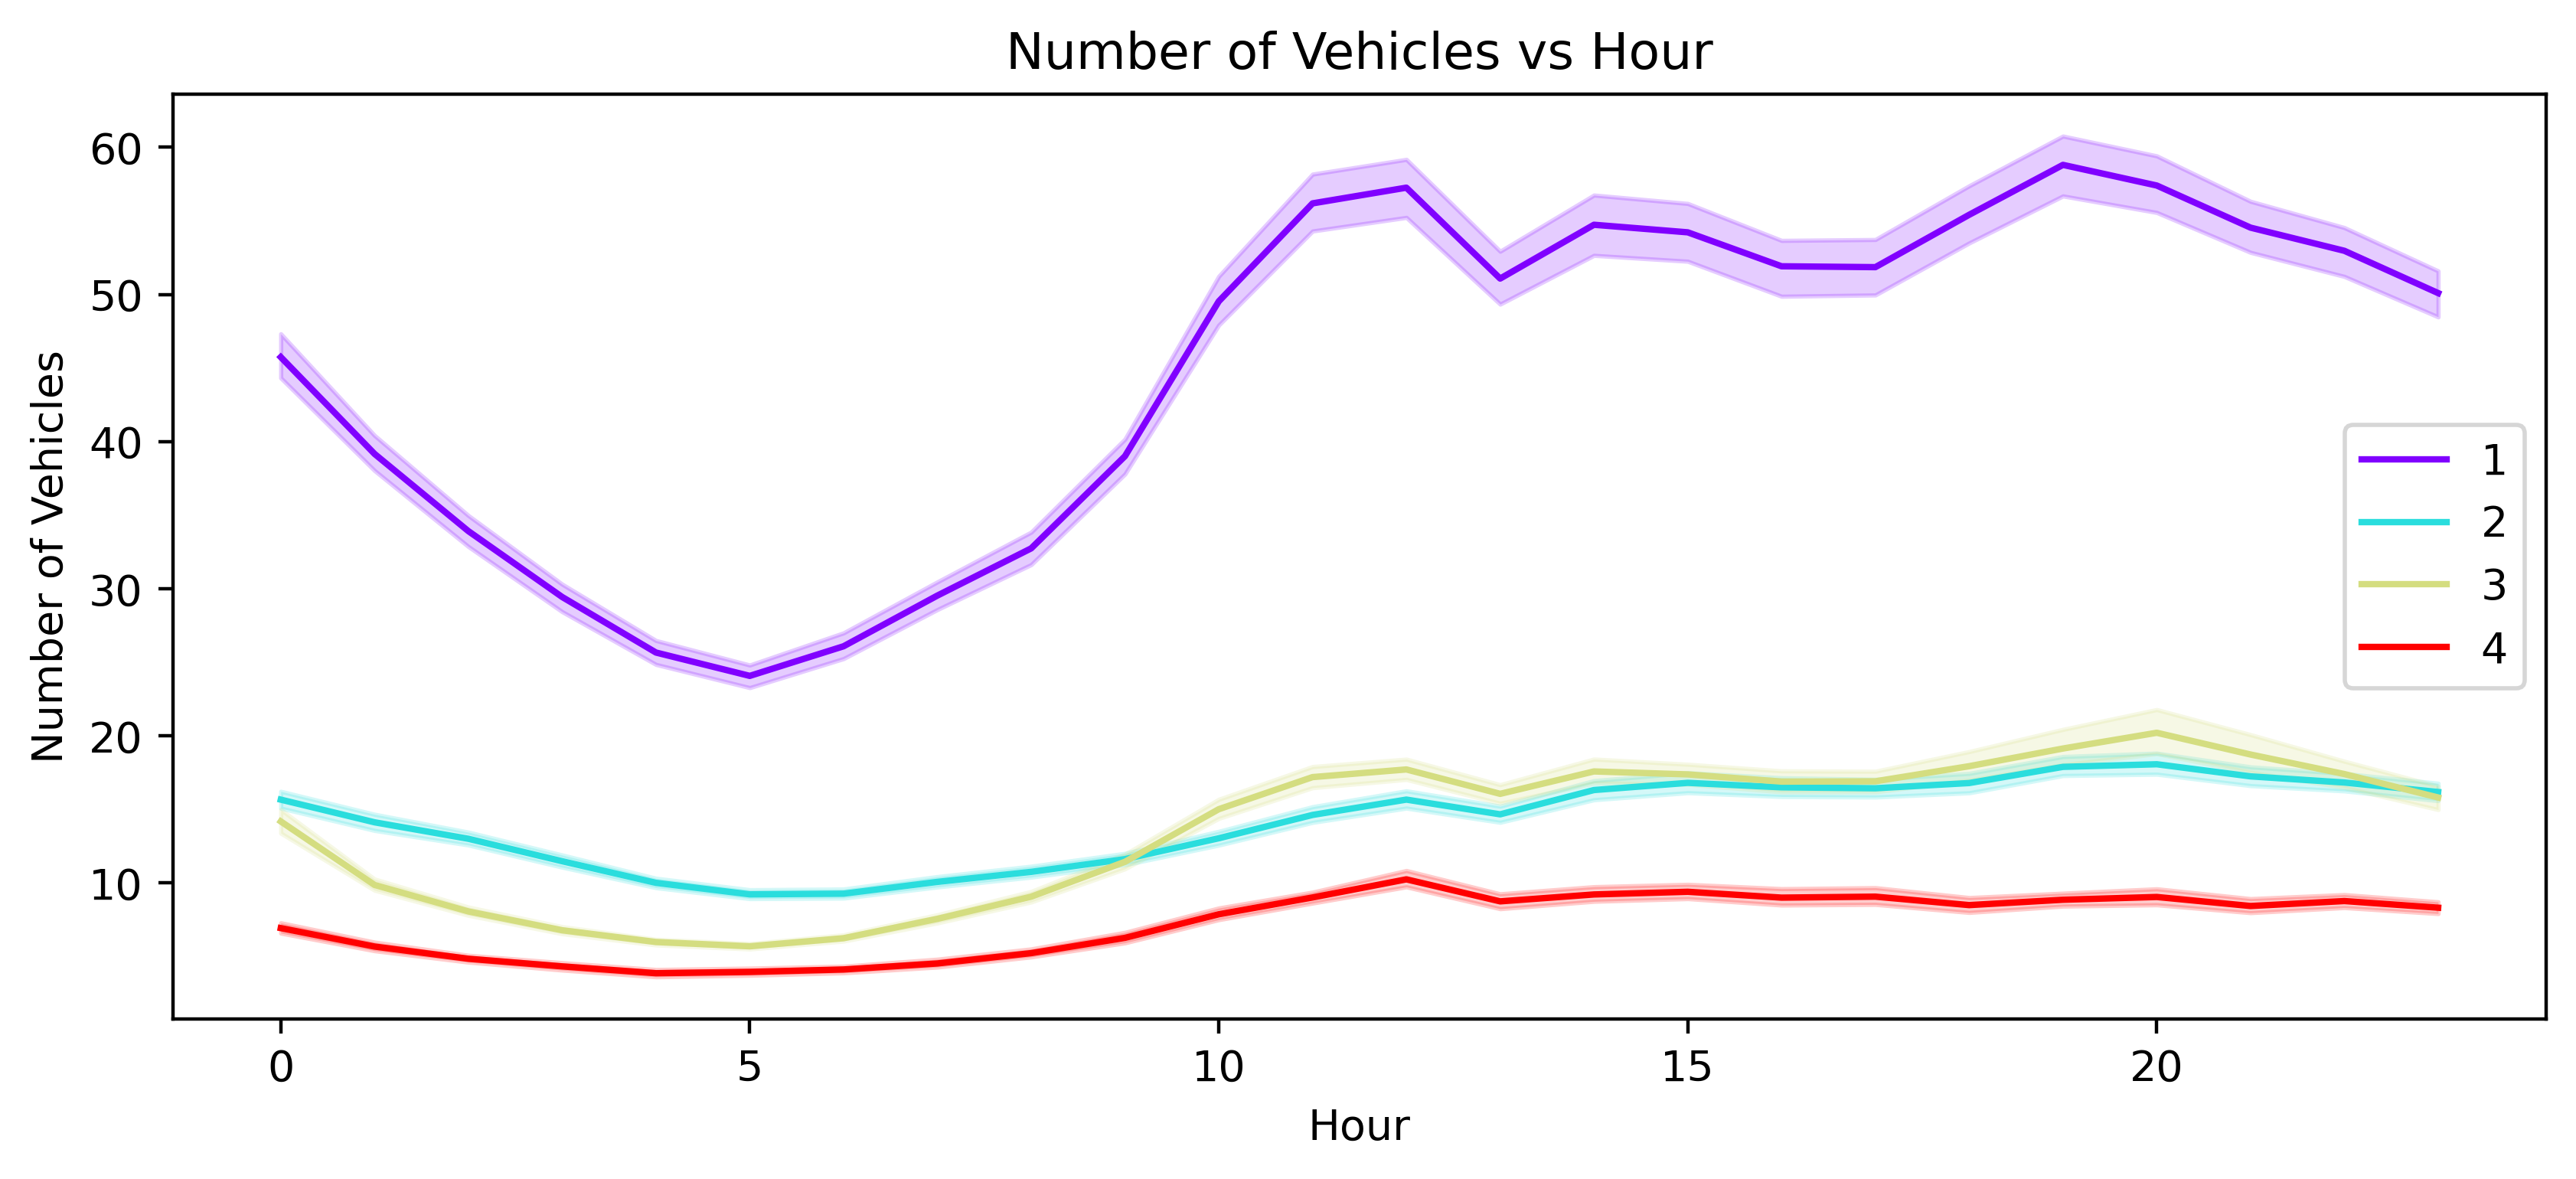

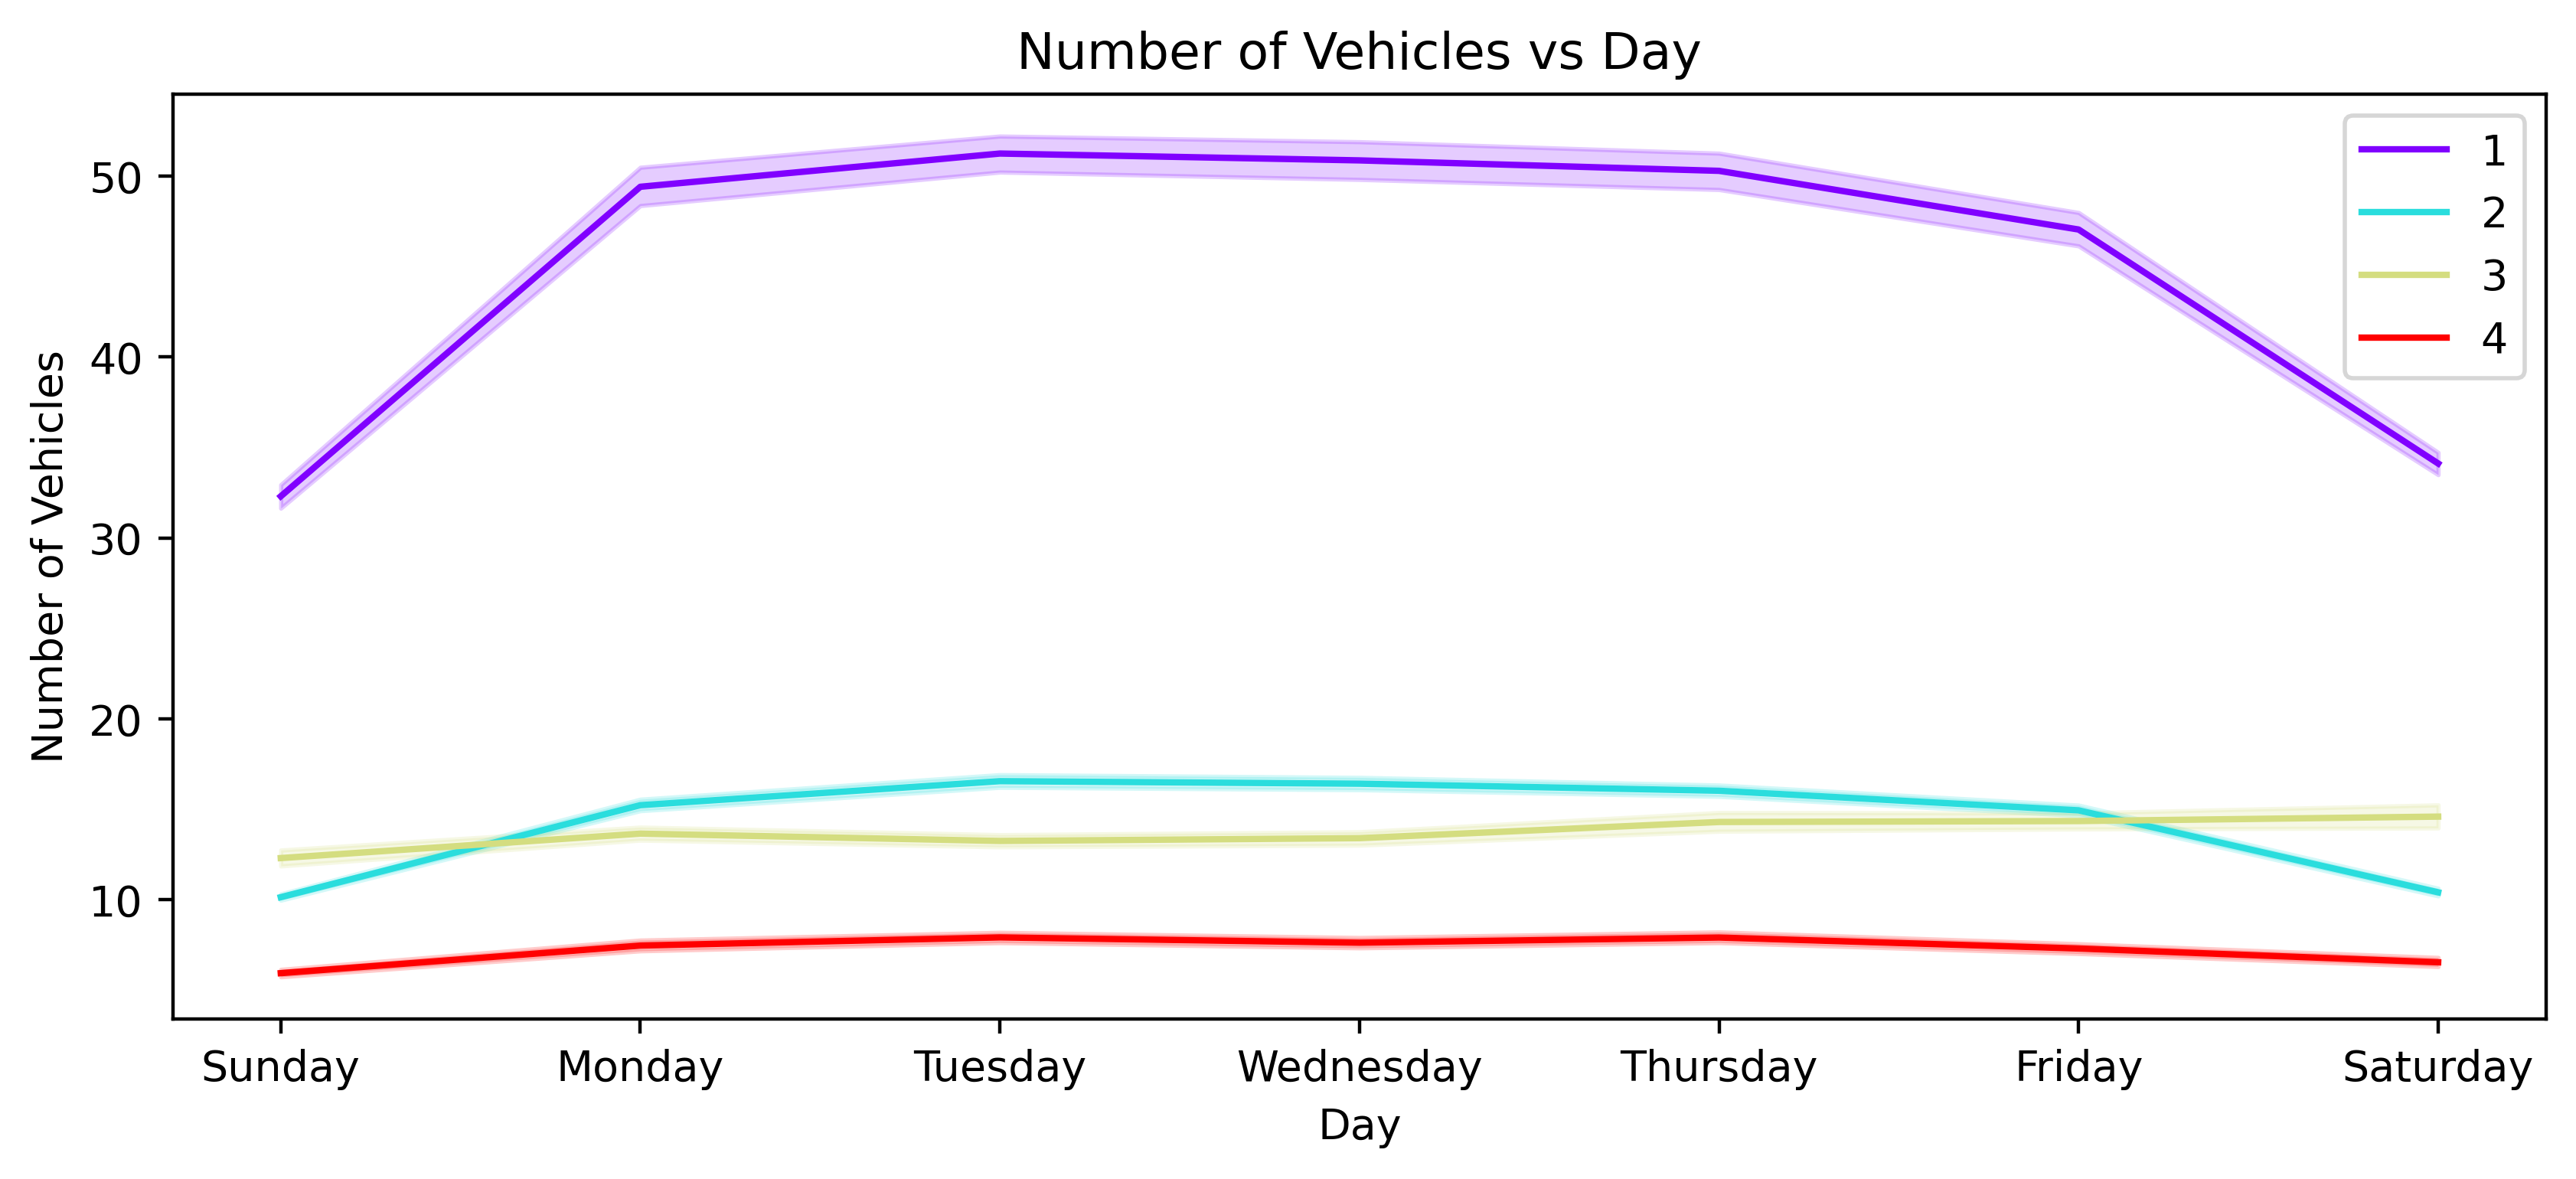

In [15]:
new_features_added= ['Year', 'Month', 'Date', 'Hour', 'Day']

for feature in new_features_added:
    plt.figure(figsize=(10, 4), dpi = 400)
    sns.lineplot(x = df_new[feature], y = "Vehicles", data = df_new, hue="Junction", palette="rainbow")
    plt.title("Number of Vehicles vs "+ str(feature))
    plt.xlabel(feature)
    plt.ylabel('Number of Vehicles')
    plt.legend(loc='best')
    plt.show()

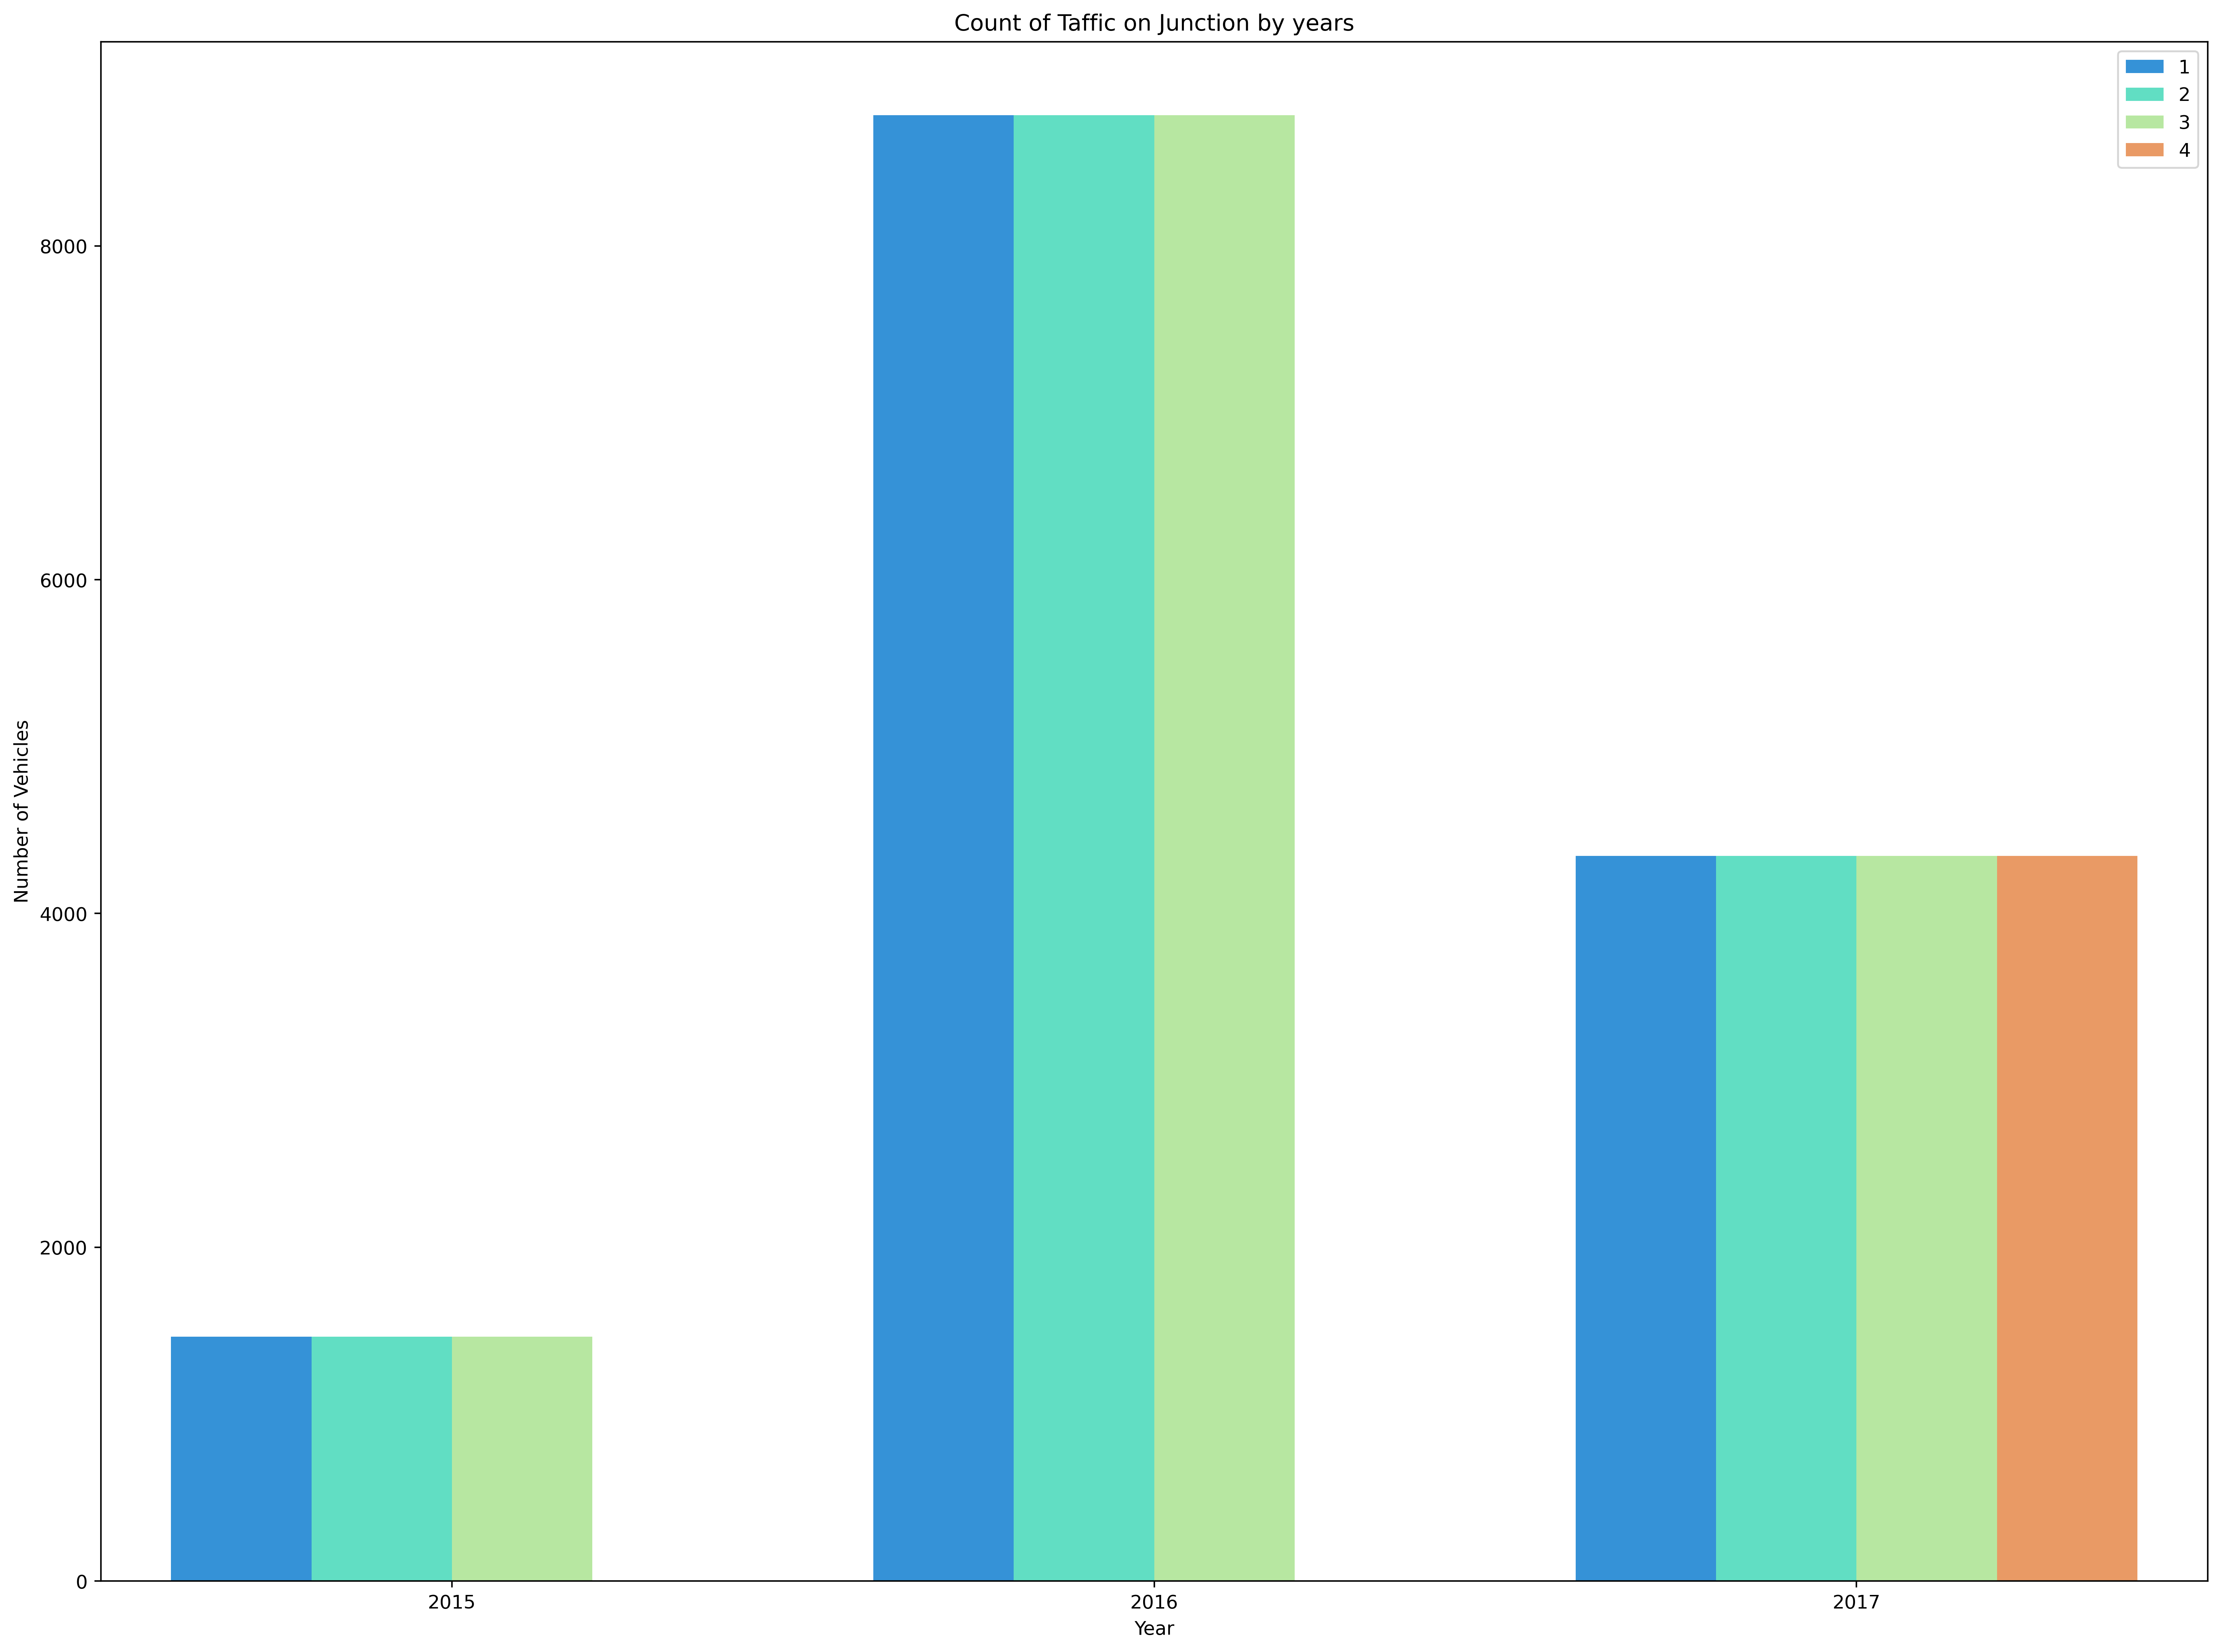

In [16]:
plt.figure(figsize=(20, 15), dpi = 400)
sns.countplot(x = df_new["Year"], hue="Junction", data = df_new, palette="rainbow")
plt.title("Count of Taffic on Junction by years")
plt.xlabel("Year")
plt.ylabel('Number of Vehicles')
plt.legend(loc='best')
plt.show()

In [17]:
values_vehs, counts_vehs = np.unique(df_new['Year'], return_counts=True)
print(values_vehs, counts_vehs)

[2015 2016 2017] [ 4392 26352 17376]


We can see that the number of vehicles in the year 2016 increased and then decreased in the year 2017.
This is due to the fact given below.

In [18]:
val_2017, count_2017 = np.unique(df_new['Month'][df_new['Year'] == 2017], return_counts=True)
print(val_2017, count_2017)

[1 2 3 4 5 6] [2976 2688 2976 2880 2976 2880]


We can see that the data consists of only 6 months of data for the year 2017.

In [15]:
df_new

DateTime  Junction  Vehicles  Year  Month  Date  Hour     Day
0     2015-11-01 00:00:00         1        15  2015     11     1     0  Sunday
1     2015-11-01 01:00:00         1        13  2015     11     1     1  Sunday
2     2015-11-01 02:00:00         1        10  2015     11     1     2  Sunday
3     2015-11-01 03:00:00         1         7  2015     11     1     3  Sunday
4     2015-11-01 04:00:00         1         9  2015     11     1     4  Sunday
...                   ...       ...       ...   ...    ...   ...   ...     ...
48115 2017-06-30 19:00:00         4        11  2017      6    30    19  Friday
48116 2017-06-30 20:00:00         4        30  2017      6    30    20  Friday
48117 2017-06-30 21:00:00         4        16  2017      6    30    21  Friday
48118 2017-06-30 22:00:00         4        22  2017      6    30    22  Friday
48119 2017-06-30 23:00:00         4        12  2017      6    30    23  Friday

[48120 rows x 8 columns]

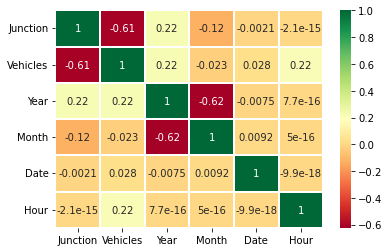

In [16]:
sns.heatmap(df_new.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoded_values = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}

df_new['Day'] = df_new['Day'].map(encoded_values)
df_new

DateTime  Junction  Vehicles  Year  Month  Date  Hour  Day
0     2015-11-01 00:00:00         1        15  2015     11     1     0    6
1     2015-11-01 01:00:00         1        13  2015     11     1     1    6
2     2015-11-01 02:00:00         1        10  2015     11     1     2    6
3     2015-11-01 03:00:00         1         7  2015     11     1     3    6
4     2015-11-01 04:00:00         1         9  2015     11     1     4    6
...                   ...       ...       ...   ...    ...   ...   ...  ...
48115 2017-06-30 19:00:00         4        11  2017      6    30    19    4
48116 2017-06-30 20:00:00         4        30  2017      6    30    20    4
48117 2017-06-30 21:00:00         4        16  2017      6    30    21    4
48118 2017-06-30 22:00:00         4        22  2017      6    30    22    4
48119 2017-06-30 23:00:00         4        12  2017      6    30    23    4

[48120 rows x 8 columns]

In [18]:
df_1 = df_new[df_new['Junction'] == 1]
df_1

DateTime  Junction  Vehicles  Year  Month  Date  Hour  Day
0     2015-11-01 00:00:00         1        15  2015     11     1     0    6
1     2015-11-01 01:00:00         1        13  2015     11     1     1    6
2     2015-11-01 02:00:00         1        10  2015     11     1     2    6
3     2015-11-01 03:00:00         1         7  2015     11     1     3    6
4     2015-11-01 04:00:00         1         9  2015     11     1     4    6
...                   ...       ...       ...   ...    ...   ...   ...  ...
14587 2017-06-30 19:00:00         1       105  2017      6    30    19    4
14588 2017-06-30 20:00:00         1        96  2017      6    30    20    4
14589 2017-06-30 21:00:00         1        90  2017      6    30    21    4
14590 2017-06-30 22:00:00         1        84  2017      6    30    22    4
14591 2017-06-30 23:00:00         1        78  2017      6    30    23    4

[14592 rows x 8 columns]

In [19]:
df_2 = df_new[df_new['Junction'] == 2]
df_2.reset_index(drop=True, inplace=True)
df_2

DateTime  Junction  Vehicles  Year  Month  Date  Hour  Day
0     2015-11-01 00:00:00         2         6  2015     11     1     0    6
1     2015-11-01 01:00:00         2         6  2015     11     1     1    6
2     2015-11-01 02:00:00         2         5  2015     11     1     2    6
3     2015-11-01 03:00:00         2         6  2015     11     1     3    6
4     2015-11-01 04:00:00         2         7  2015     11     1     4    6
...                   ...       ...       ...   ...    ...   ...   ...  ...
14587 2017-06-30 19:00:00         2        34  2017      6    30    19    4
14588 2017-06-30 20:00:00         2        35  2017      6    30    20    4
14589 2017-06-30 21:00:00         2        31  2017      6    30    21    4
14590 2017-06-30 22:00:00         2        29  2017      6    30    22    4
14591 2017-06-30 23:00:00         2        27  2017      6    30    23    4

[14592 rows x 8 columns]

In [20]:
df_3 = df_new[df_new['Junction'] == 3]
df_3.reset_index(drop=True, inplace=True)
df_3

DateTime  Junction  Vehicles  Year  Month  Date  Hour  Day
0     2015-11-01 00:00:00         3         9  2015     11     1     0    6
1     2015-11-01 01:00:00         3         7  2015     11     1     1    6
2     2015-11-01 02:00:00         3         5  2015     11     1     2    6
3     2015-11-01 03:00:00         3         1  2015     11     1     3    6
4     2015-11-01 04:00:00         3         2  2015     11     1     4    6
...                   ...       ...       ...   ...    ...   ...   ...  ...
14587 2017-06-30 19:00:00         3        33  2017      6    30    19    4
14588 2017-06-30 20:00:00         3        31  2017      6    30    20    4
14589 2017-06-30 21:00:00         3        28  2017      6    30    21    4
14590 2017-06-30 22:00:00         3        26  2017      6    30    22    4
14591 2017-06-30 23:00:00         3        39  2017      6    30    23    4

[14592 rows x 8 columns]

In [21]:
df_4 = df_new[df_new['Junction'] == 4]
df_4.reset_index(drop = True, inplace = True)
df_4

DateTime  Junction  Vehicles  Year  Month  Date  Hour  Day
0    2017-01-01 00:00:00         4         3  2017      1     1     0    6
1    2017-01-01 01:00:00         4         1  2017      1     1     1    6
2    2017-01-01 02:00:00         4         4  2017      1     1     2    6
3    2017-01-01 03:00:00         4         4  2017      1     1     3    6
4    2017-01-01 04:00:00         4         2  2017      1     1     4    6
...                  ...       ...       ...   ...    ...   ...   ...  ...
4339 2017-06-30 19:00:00         4        11  2017      6    30    19    4
4340 2017-06-30 20:00:00         4        30  2017      6    30    20    4
4341 2017-06-30 21:00:00         4        16  2017      6    30    21    4
4342 2017-06-30 22:00:00         4        22  2017      6    30    22    4
4343 2017-06-30 23:00:00         4        12  2017      6    30    23    4

[4344 rows x 8 columns]

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# df_1['Vehicles'] = scaler.fit_transform(df_1['Vehicles'].values.reshape(-1, 1))
# df_2['Vehicles'] = scaler.fit_transform(df_2['Vehicles'].values.reshape(-1, 1))
# df_3['Vehicles'] = scaler.fit_transform(df_3['Vehicles'].values.reshape(-1, 1))
# df_4['Vehicles'] = scaler.fit_transform(df_4['Vehicles'].values.reshape(-1, 1))

In [23]:
df_1

DateTime  Junction  Vehicles  Year  Month  Date  Hour  Day
0     2015-11-01 00:00:00         1        15  2015     11     1     0    6
1     2015-11-01 01:00:00         1        13  2015     11     1     1    6
2     2015-11-01 02:00:00         1        10  2015     11     1     2    6
3     2015-11-01 03:00:00         1         7  2015     11     1     3    6
4     2015-11-01 04:00:00         1         9  2015     11     1     4    6
...                   ...       ...       ...   ...    ...   ...   ...  ...
14587 2017-06-30 19:00:00         1       105  2017      6    30    19    4
14588 2017-06-30 20:00:00         1        96  2017      6    30    20    4
14589 2017-06-30 21:00:00         1        90  2017      6    30    21    4
14590 2017-06-30 22:00:00         1        84  2017      6    30    22    4
14591 2017-06-30 23:00:00         1        78  2017      6    30    23    4

[14592 rows x 8 columns]

In [24]:
df_2

DateTime  Junction  Vehicles  Year  Month  Date  Hour  Day
0     2015-11-01 00:00:00         2         6  2015     11     1     0    6
1     2015-11-01 01:00:00         2         6  2015     11     1     1    6
2     2015-11-01 02:00:00         2         5  2015     11     1     2    6
3     2015-11-01 03:00:00         2         6  2015     11     1     3    6
4     2015-11-01 04:00:00         2         7  2015     11     1     4    6
...                   ...       ...       ...   ...    ...   ...   ...  ...
14587 2017-06-30 19:00:00         2        34  2017      6    30    19    4
14588 2017-06-30 20:00:00         2        35  2017      6    30    20    4
14589 2017-06-30 21:00:00         2        31  2017      6    30    21    4
14590 2017-06-30 22:00:00         2        29  2017      6    30    22    4
14591 2017-06-30 23:00:00         2        27  2017      6    30    23    4

[14592 rows x 8 columns]

In [25]:
df_3

DateTime  Junction  Vehicles  Year  Month  Date  Hour  Day
0     2015-11-01 00:00:00         3         9  2015     11     1     0    6
1     2015-11-01 01:00:00         3         7  2015     11     1     1    6
2     2015-11-01 02:00:00         3         5  2015     11     1     2    6
3     2015-11-01 03:00:00         3         1  2015     11     1     3    6
4     2015-11-01 04:00:00         3         2  2015     11     1     4    6
...                   ...       ...       ...   ...    ...   ...   ...  ...
14587 2017-06-30 19:00:00         3        33  2017      6    30    19    4
14588 2017-06-30 20:00:00         3        31  2017      6    30    20    4
14589 2017-06-30 21:00:00         3        28  2017      6    30    21    4
14590 2017-06-30 22:00:00         3        26  2017      6    30    22    4
14591 2017-06-30 23:00:00         3        39  2017      6    30    23    4

[14592 rows x 8 columns]

In [26]:
df_4

DateTime  Junction  Vehicles  Year  Month  Date  Hour  Day
0    2017-01-01 00:00:00         4         3  2017      1     1     0    6
1    2017-01-01 01:00:00         4         1  2017      1     1     1    6
2    2017-01-01 02:00:00         4         4  2017      1     1     2    6
3    2017-01-01 03:00:00         4         4  2017      1     1     3    6
4    2017-01-01 04:00:00         4         2  2017      1     1     4    6
...                  ...       ...       ...   ...    ...   ...   ...  ...
4339 2017-06-30 19:00:00         4        11  2017      6    30    19    4
4340 2017-06-30 20:00:00         4        30  2017      6    30    20    4
4341 2017-06-30 21:00:00         4        16  2017      6    30    21    4
4342 2017-06-30 22:00:00         4        22  2017      6    30    22    4
4343 2017-06-30 23:00:00         4        12  2017      6    30    23    4

[4344 rows x 8 columns]

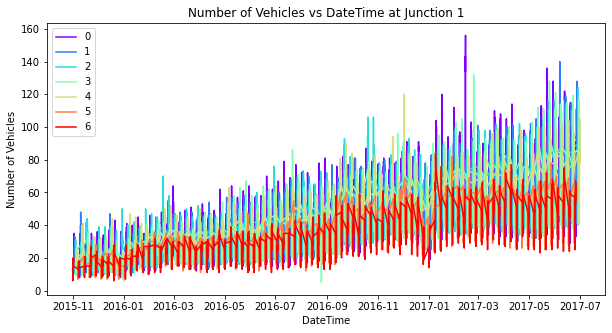

In [26]:
plt.figure(figsize=(10, 5))
sns.lineplot(x = df_1['DateTime'], y = "Vehicles", data = df_1, hue="Day", palette="rainbow")
plt.title("Number of Vehicles vs DateTime at Junction 1")
plt.xlabel("DateTime")
plt.ylabel('Number of Vehicles')
plt.legend(loc='best')
plt.show()

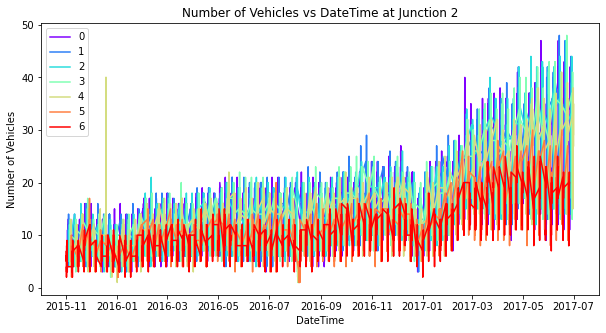

In [27]:
plt.figure(figsize=(10, 5))
sns.lineplot(x = df_2['DateTime'], y = "Vehicles", data = df_2, hue="Day", palette="rainbow")
plt.title("Number of Vehicles vs DateTime at Junction 2")
plt.xlabel("DateTime")
plt.ylabel('Number of Vehicles')
plt.legend(loc='best')
plt.show()

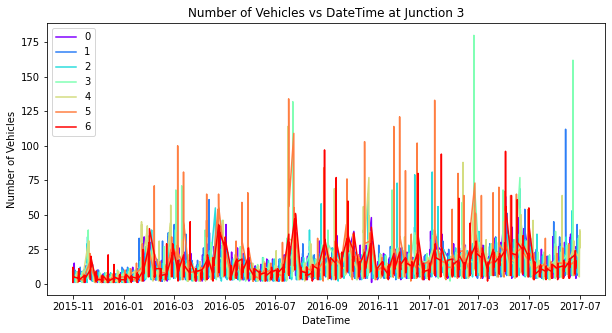

In [28]:
plt.figure(figsize=(10, 5))
sns.lineplot(x = df_3['DateTime'], y = "Vehicles", data = df_3, hue="Day", palette="rainbow")
plt.title("Number of Vehicles vs DateTime at Junction 3")
plt.xlabel("DateTime")
plt.ylabel('Number of Vehicles')
plt.legend(loc='best')
plt.show()

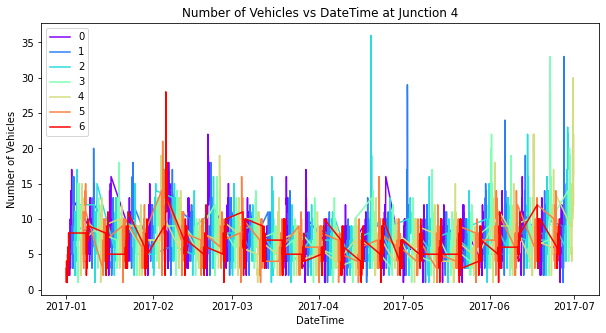

In [29]:
plt.figure(figsize=(10, 5))
sns.lineplot(x = df_4['DateTime'], y = "Vehicles", data = df_4, hue="Day", palette="rainbow")
plt.title("Number of Vehicles vs DateTime at Junction 4")
plt.xlabel("DateTime")
plt.ylabel('Number of Vehicles')
plt.legend(loc='best')
plt.show()

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [28]:
X1, y1 = df_1.drop(['Vehicles', 'DateTime', 'Junction'], axis=1), df_1['Vehicles']
X2, y2 = df_2.drop(['Vehicles', 'DateTime', 'Junction'], axis=1), df_2['Vehicles']
X3, y3 = df_3.drop(['Vehicles', 'DateTime', 'Junction'], axis=1), df_3['Vehicles']
X4, y4 = df_4.drop(['Vehicles', 'DateTime', 'Junction'], axis=1), df_4['Vehicles']

In [29]:
X1

Year  Month  Date  Hour  Day
0      2015     11     1     0    6
1      2015     11     1     1    6
2      2015     11     1     2    6
3      2015     11     1     3    6
4      2015     11     1     4    6
...     ...    ...   ...   ...  ...
14587  2017      6    30    19    4
14588  2017      6    30    20    4
14589  2017      6    30    21    4
14590  2017      6    30    22    4
14591  2017      6    30    23    4

[14592 rows x 5 columns]

In [30]:
y1

0         15
1         13
2         10
3          7
4          9
        ... 
14587    105
14588     96
14589     90
14590     84
14591     78
Name: Vehicles, Length: 14592, dtype: int64

In [31]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=42)

In [32]:
X_trains = [X1_train, X2_train, X3_train, X4_train]
X_tests = [X1_test, X2_test, X3_test, X4_test]
y_trains = [y1_train, y2_train, y3_train, y4_train]
y_tests = [y1_test, y2_test, y3_test, y4_test]

In [33]:
models = [DecisionTreeRegressor(max_depth=5, random_state=42, 
            min_samples_leaf=5, min_samples_split=5),
            LinearRegression(), 
            RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42, min_samples_leaf=5, min_samples_split=5), 
            GridSearchCV(RandomForestRegressor(random_state=42), param_grid={'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [5, 10, 15, 20, 25]}, cv=5), 
            xgb.XGBRegressor(n_estimators=100, max_depth=5, random_state=42, framework_version=1.3),
            GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid={'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [5, 10, 15, 20, 25]}, cv=5),
            lgb.LGBMRegressor(n_estimators=100, max_depth=5, random_state=42),
            GridSearchCV(lgb.LGBMRegressor(random_state=42), param_grid={'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [5, 10, 15, 20, 25]}, cv=5),]

In [34]:
def plot_prediction_vs_datetime(df, y_pred, y_test, title):
    plt.figure(figsize=(10, 5))
    sns.lineplot(x = [i for i in range(df.shape[0])], y = y_test, data = df, palette="rainbow", label="Actual")
    sns.lineplot(x = [i for i in range(df.shape[0])],y= y_pred, data = df, palette="rainbow", label="Predicted")
    plt.title(title)
    plt.xlabel("DateTime")
    plt.ylabel('Number of Vehicles')
    plt.legend(loc='best')
    plt.show()

In [35]:
models_short = ["DecisionTreeRegressor", "LinearRegressor", "RandomForestRegressor", "GridSearchCV(RandomForestRegressor)", "xgb.XGBRegressor", "GridSearchCV(xgboost)", "lgb.LGBMRegressor", "GridSearchCV(lightgbm)"]

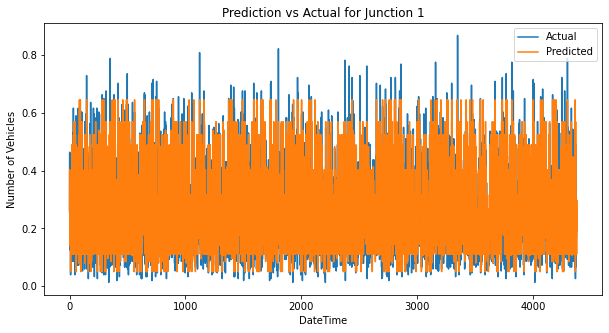

Accuracy score (Junction 1) for the model DecisionTreeRegressor on the train set: 0.8407958265267639
Accuracy score (Junction 1) for the model DecisionTreeRegressor on the test set: 0.8359537694426901
RMSE score (Junction 1) for the model DecisionTreeRegressor on the test set: 0.06118610837548042


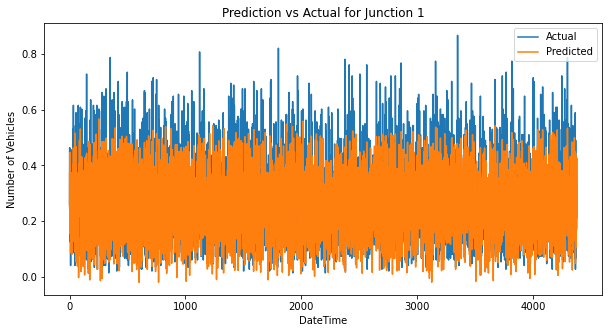

Accuracy score (Junction 1) for the model LinearRegressor on the train set: 0.6390197297201838
Accuracy score (Junction 1) for the model LinearRegressor on the test set: 0.6325041783528421
RMSE score (Junction 1) for the model LinearRegressor on the test set: 0.09157900203844148


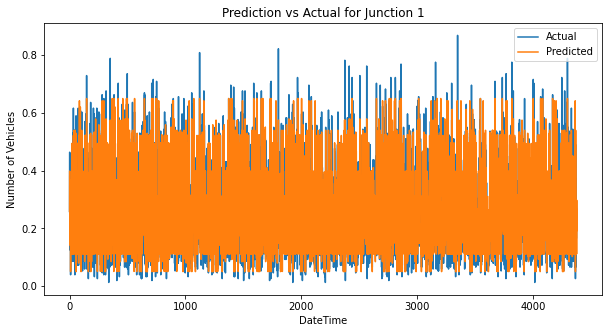

Accuracy score (Junction 1) for the model RandomForestRegressor on the train set: 0.8470640929686102
Accuracy score (Junction 1) for the model RandomForestRegressor on the test set: 0.8427590792970676
RMSE score (Junction 1) for the model RandomForestRegressor on the test set: 0.05990354069776843


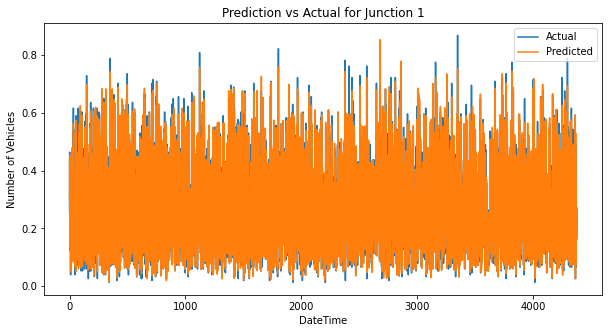

Accuracy score (Junction 1) for the model GridSearchCV(RandomForestRegressor) on the train set: 0.9954594405124034
Accuracy score (Junction 1) for the model GridSearchCV(RandomForestRegressor) on the test set: 0.9663991860159469
RMSE score (Junction 1) for the model GridSearchCV(RandomForestRegressor) on the test set: 0.0276913802304318


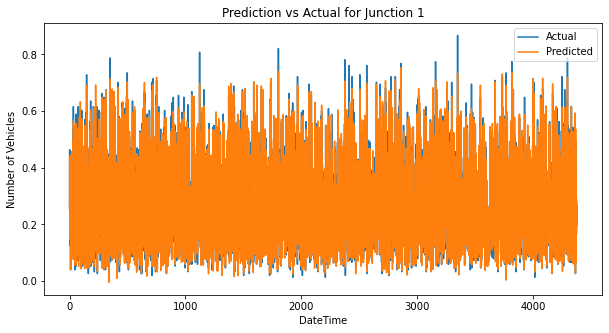

Accuracy score (Junction 1) for the model xgb.XGBRegressor on the train set: 0.9750622900451261
Accuracy score (Junction 1) for the model xgb.XGBRegressor on the test set: 0.9696833452426695
RMSE score (Junction 1) for the model xgb.XGBRegressor on the test set: 0.026303306330886827


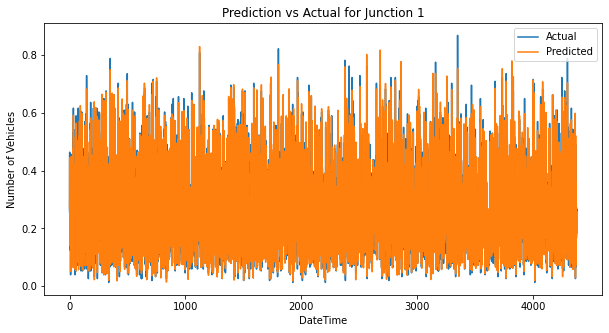

Accuracy score (Junction 1) for the model GridSearchCV(xgboost) on the train set: 0.9982906484817856
Accuracy score (Junction 1) for the model GridSearchCV(xgboost) on the test set: 0.9741134371943652
RMSE score (Junction 1) for the model GridSearchCV(xgboost) on the test set: 0.02430563088814929


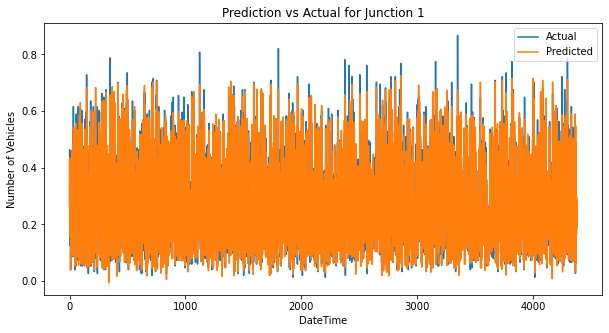

Accuracy score (Junction 1) for the model lgb.LGBMRegressor on the train set: 0.960213932124032
Accuracy score (Junction 1) for the model lgb.LGBMRegressor on the test set: 0.9592927627950053
RMSE score (Junction 1) for the model lgb.LGBMRegressor on the test set: 0.030479337134486837


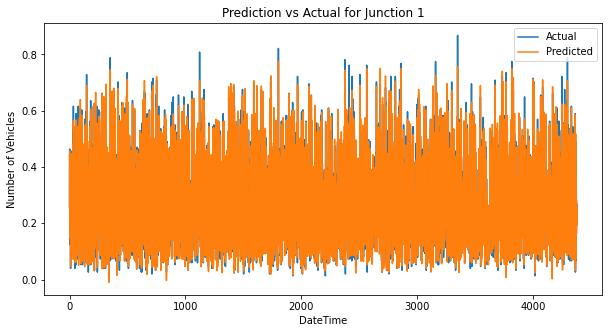

Accuracy score (Junction 1) for the model GridSearchCV(lightgbm) on the train set: 0.9846079330767183
Accuracy score (Junction 1) for the model GridSearchCV(lightgbm) on the test set: 0.9753823289109363
RMSE score (Junction 1) for the model GridSearchCV(lightgbm) on the test set: 0.023702447113830984


In [168]:
model_used_Junction_1 = []
scores_train_Junction_1 = []
scores_test_Junction_1 = []
rmse_Junction_1 = []

for i in range(len(models)):
    models[i].fit(X_trains[0], y_trains[0])
    preds_test = models[i].predict(X_tests[0])
    preds_complete = models[i].predict(X1)
    plot_prediction_vs_datetime(X_tests[0], preds_test, y_tests[0], 'Prediction vs Actual for Junction 1')
    train_score = models[i].score(X_trains[0], y_trains[0])
    test_score = models[i].score(X_tests[0], y_tests[0])
    print(f"Accuracy score (Junction 1) for the model {models_short[i]} on the train set: {train_score}")
    print(f"Accuracy score (Junction 1) for the model {models_short[i]} on the test set: {test_score}")
    print(f"RMSE score (Junction 1) for the model {models_short[i]} on the test set: {mean_squared_error(y_tests[0], preds_test)**(1/2)}")
    model_used_Junction_1.append(models[i])
    scores_train_Junction_1.append(train_score)
    scores_test_Junction_1.append(test_score)
    rmse_Junction_1.append(mean_squared_error(y_tests[0], preds_test)**0.5)

In [169]:
print("FOR JUNCTION 1\n")
for i in range(len(models_short)):
    print(f"{models_short[i]}\n   Train Score: {scores_train_Junction_1[i]} - Test Score: {scores_test_Junction_1[i]} - RMSE: {rmse_Junction_1[i]}\n")

FOR JUNCTION 1

DecisionTreeRegressor
   Train Score: 0.8407958265267639 - Test Score: 0.8359537694426901 - RMSE: 0.06118610837548042

LinearRegressor
   Train Score: 0.6390197297201838 - Test Score: 0.6325041783528421 - RMSE: 0.09157900203844148

RandomForestRegressor
   Train Score: 0.8470640929686102 - Test Score: 0.8427590792970676 - RMSE: 0.05990354069776843

GridSearchCV(RandomForestRegressor)
   Train Score: 0.9954594405124034 - Test Score: 0.9663991860159469 - RMSE: 0.0276913802304318

xgb.XGBRegressor
   Train Score: 0.9750622900451261 - Test Score: 0.9696833452426695 - RMSE: 0.026303306330886827

GridSearchCV(xgboost)
   Train Score: 0.9982906484817856 - Test Score: 0.9741134371943652 - RMSE: 0.02430563088814929

lgb.LGBMRegressor
   Train Score: 0.960213932124032 - Test Score: 0.9592927627950053 - RMSE: 0.030479337134486837

GridSearchCV(lightgbm)
   Train Score: 0.9846079330767183 - Test Score: 0.9753823289109363 - RMSE: 0.023702447113830984



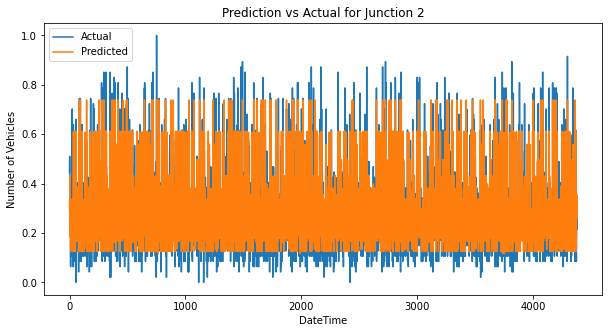

Accuracy score (Junction 2) for the model DecisionTreeRegressor on the train set: 0.8067184720580369
Accuracy score (Junction 2) for the model DecisionTreeRegressor on the test set: 0.7850271155030815
RMSE score (Junction 2) for the model DecisionTreeRegressor on the test set: 0.07196016892914403


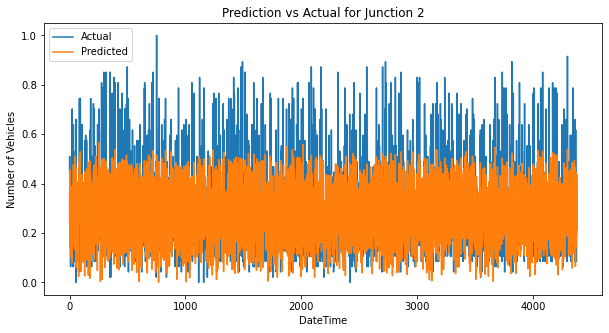

Accuracy score (Junction 2) for the model LinearRegressor on the train set: 0.5452419855766217
Accuracy score (Junction 2) for the model LinearRegressor on the test set: 0.5156119106799304
RMSE score (Junction 2) for the model LinearRegressor on the test set: 0.10801823087449113


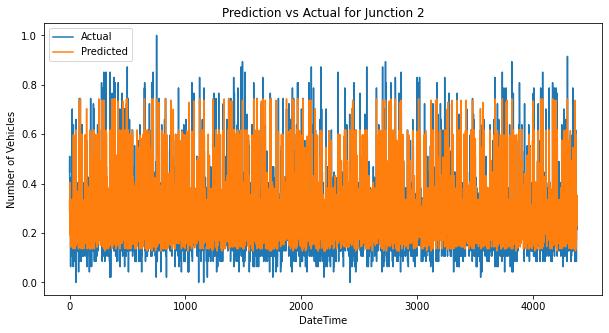

Accuracy score (Junction 2) for the model RandomForestRegressor on the train set: 0.8213745387737392
Accuracy score (Junction 2) for the model RandomForestRegressor on the test set: 0.8029248405980968
RMSE score (Junction 2) for the model RandomForestRegressor on the test set: 0.06889953256448354


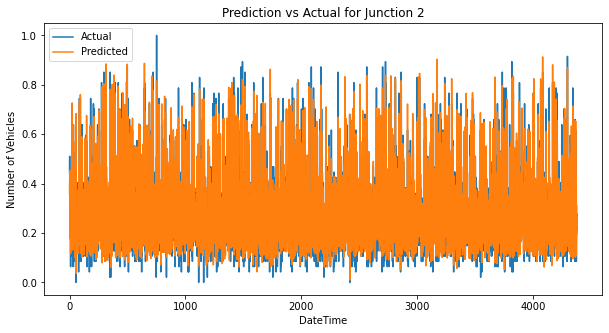

Accuracy score (Junction 2) for the model GridSearchCV(RandomForestRegressor) on the train set: 0.9793731188095952
Accuracy score (Junction 2) for the model GridSearchCV(RandomForestRegressor) on the test set: 0.9030689306682105
RMSE score (Junction 2) for the model GridSearchCV(RandomForestRegressor) on the test set: 0.04832054613697625


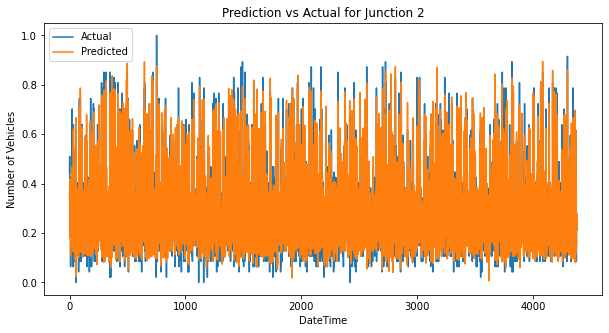

Accuracy score (Junction 2) for the model xgb.XGBRegressor on the train set: 0.9363575734823865
Accuracy score (Junction 2) for the model xgb.XGBRegressor on the test set: 0.9069273618101582
RMSE score (Junction 2) for the model xgb.XGBRegressor on the test set: 0.04734905813541196


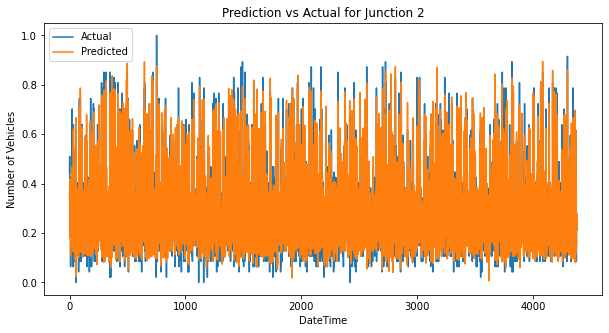

Accuracy score (Junction 2) for the model GridSearchCV(xgboost) on the train set: 0.9363575734823865
Accuracy score (Junction 2) for the model GridSearchCV(xgboost) on the test set: 0.9069273618101582
RMSE score (Junction 2) for the model GridSearchCV(xgboost) on the test set: 0.04734905813541196


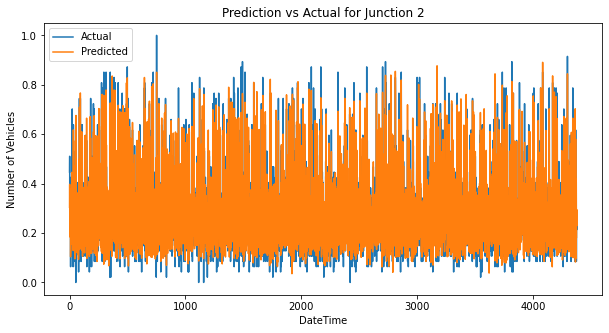

Accuracy score (Junction 2) for the model lgb.LGBMRegressor on the train set: 0.9157137237548637
Accuracy score (Junction 2) for the model lgb.LGBMRegressor on the test set: 0.9015004600828235
RMSE score (Junction 2) for the model lgb.LGBMRegressor on the test set: 0.04870992190154955


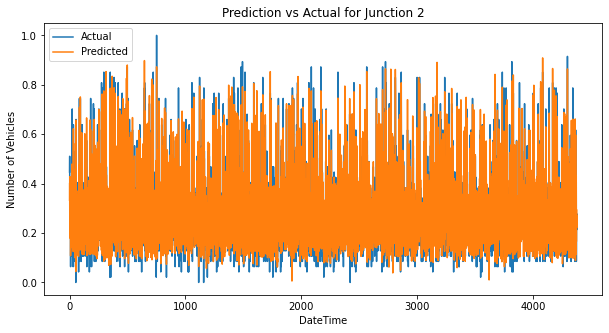

Accuracy score (Junction 2) for the model GridSearchCV(lightgbm) on the train set: 0.9418674199141464
Accuracy score (Junction 2) for the model GridSearchCV(lightgbm) on the test set: 0.9117378990695377
RMSE score (Junction 2) for the model GridSearchCV(lightgbm) on the test set: 0.04610918678100267


In [170]:
models_used_Junctions_2 = []
scores_train_Junctions_2 = []
scores_test_Junctions_2 = []
rmse_Junctions_2 = []

for i in range(len(models)):
    models[i].fit(X_trains[1], y_trains[1])
    preds_test = models[i].predict(X_tests[1])
    preds_complete = models[i].predict(X2)
    plot_prediction_vs_datetime(X_tests[1], preds_test, y_tests[1], 'Prediction vs Actual for Junction 2')
    train_score = models[i].score(X_trains[1], y_trains[1])
    test_score = models[i].score(X_tests[1], y_tests[1])
    print(f"Accuracy score (Junction 2) for the model {models_short[i]} on the train set: {train_score}")
    print(f"Accuracy score (Junction 2) for the model {models_short[i]} on the test set: {test_score}")
    print(f"RMSE score (Junction 2) for the model {models_short[i]} on the test set: {mean_squared_error(y_tests[1], preds_test)**(1/2)}")
    models_used_Junctions_2.append(models[i])
    scores_train_Junctions_2.append(train_score)
    scores_test_Junctions_2.append(test_score)
    rmse_Junctions_2.append(mean_squared_error(y_tests[1], preds_test)**0.5)

In [171]:
print("FOR JUNCTION 2\n")
for i in range(len(models_short)):
    print(f"{models_short[i]}\n   Train Score: {scores_train_Junctions_2[i]} - Test Score: {scores_test_Junctions_2[i]} - RMSE: {rmse_Junctions_2[i]}\n")

FOR JUNCTION 2

DecisionTreeRegressor
   Train Score: 0.8067184720580369 - Test Score: 0.7850271155030815 - RMSE: 0.07196016892914403

LinearRegressor
   Train Score: 0.5452419855766217 - Test Score: 0.5156119106799304 - RMSE: 0.10801823087449113

RandomForestRegressor
   Train Score: 0.8213745387737392 - Test Score: 0.8029248405980968 - RMSE: 0.06889953256448354

GridSearchCV(RandomForestRegressor)
   Train Score: 0.9793731188095952 - Test Score: 0.9030689306682105 - RMSE: 0.04832054613697625

xgb.XGBRegressor
   Train Score: 0.9363575734823865 - Test Score: 0.9069273618101582 - RMSE: 0.04734905813541196

GridSearchCV(xgboost)
   Train Score: 0.9363575734823865 - Test Score: 0.9069273618101582 - RMSE: 0.04734905813541196

lgb.LGBMRegressor
   Train Score: 0.9157137237548637 - Test Score: 0.9015004600828235 - RMSE: 0.04870992190154955

GridSearchCV(lightgbm)
   Train Score: 0.9418674199141464 - Test Score: 0.9117378990695377 - RMSE: 0.04610918678100267



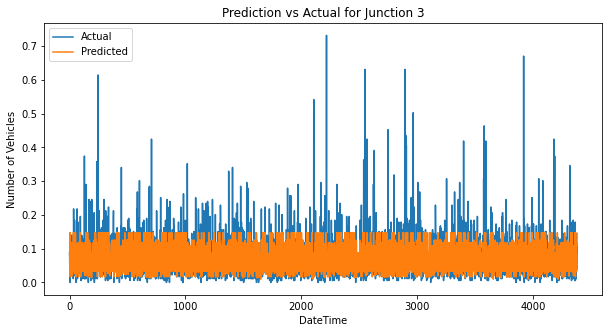

Accuracy score (Junction 3) for the model DecisionTreeRegressor on the train set: 0.38390529433521725
Accuracy score (Junction 3) for the model DecisionTreeRegressor on the test set: 0.35075889282521966
RMSE score (Junction 3) for the model DecisionTreeRegressor on the test set: 0.0463379845214096


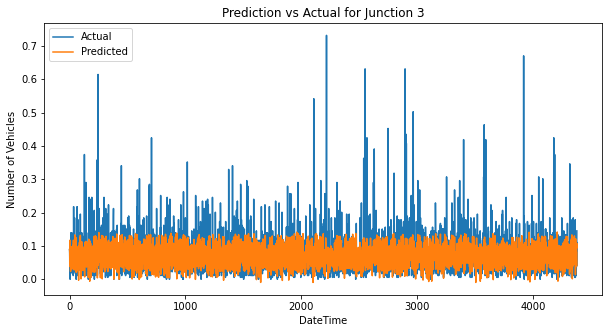

Accuracy score (Junction 3) for the model LinearRegressor on the train set: 0.2472250021429715
Accuracy score (Junction 3) for the model LinearRegressor on the test set: 0.24254373279349684
RMSE score (Junction 3) for the model LinearRegressor on the test set: 0.05005101821042756


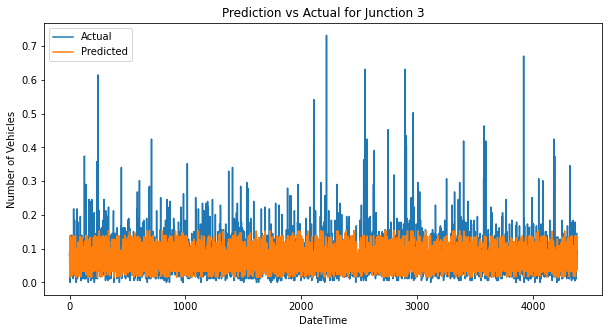

Accuracy score (Junction 3) for the model RandomForestRegressor on the train set: 0.4043157922061317
Accuracy score (Junction 3) for the model RandomForestRegressor on the test set: 0.3786899812210427
RMSE score (Junction 3) for the model RandomForestRegressor on the test set: 0.045330270818666654


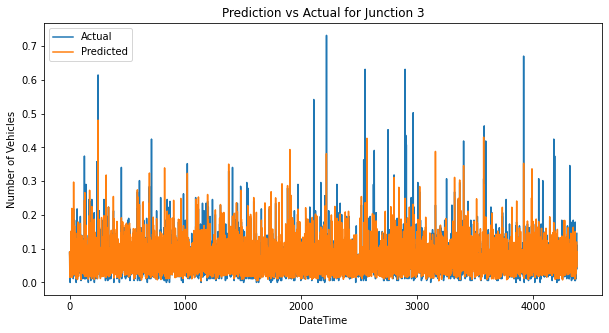

Accuracy score (Junction 3) for the model GridSearchCV(RandomForestRegressor) on the train set: 0.9640296641946572
Accuracy score (Junction 3) for the model GridSearchCV(RandomForestRegressor) on the test set: 0.7086006232467421
RMSE score (Junction 3) for the model GridSearchCV(RandomForestRegressor) on the test set: 0.031044055027950327


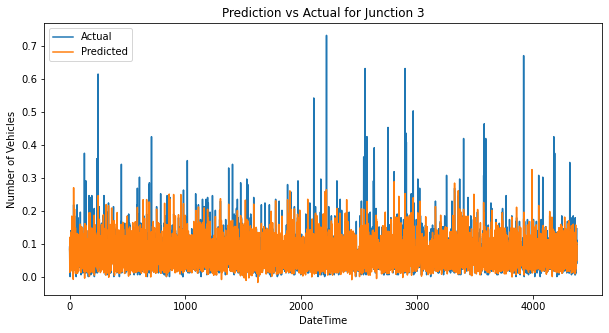

Accuracy score (Junction 3) for the model xgb.XGBRegressor on the train set: 0.7698000986061843
Accuracy score (Junction 3) for the model xgb.XGBRegressor on the test set: 0.6355669107203374
RMSE score (Junction 3) for the model xgb.XGBRegressor on the test set: 0.0347170677193233


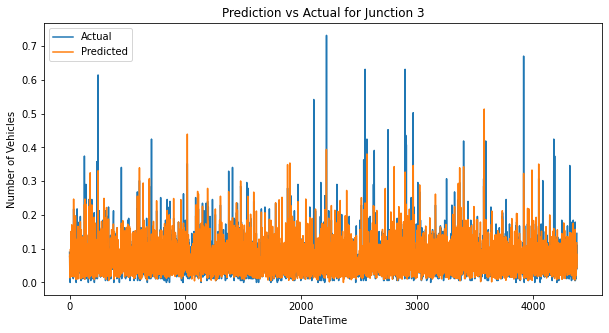

Accuracy score (Junction 3) for the model GridSearchCV(xgboost) on the train set: 0.9993753046438176
Accuracy score (Junction 3) for the model GridSearchCV(xgboost) on the test set: 0.7374127549925413
RMSE score (Junction 3) for the model GridSearchCV(xgboost) on the test set: 0.029469376589777177


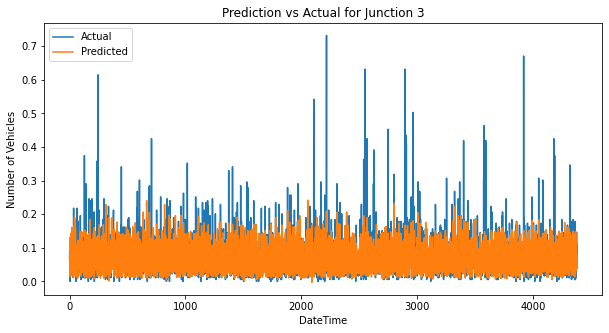

Accuracy score (Junction 3) for the model lgb.LGBMRegressor on the train set: 0.6314803445584735
Accuracy score (Junction 3) for the model lgb.LGBMRegressor on the test set: 0.5608347131606772
RMSE score (Junction 3) for the model lgb.LGBMRegressor on the test set: 0.03811080634430953


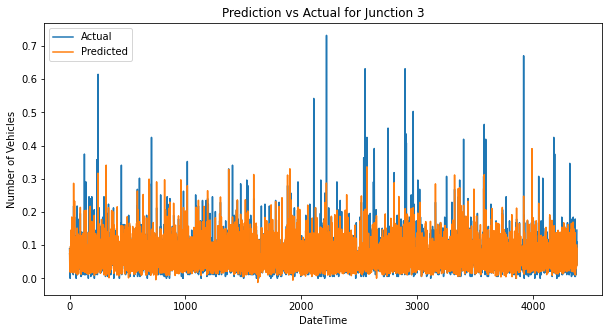

Accuracy score (Junction 3) for the model GridSearchCV(lightgbm) on the train set: 0.8714783487988101
Accuracy score (Junction 3) for the model GridSearchCV(lightgbm) on the test set: 0.6904182836526073
RMSE score (Junction 3) for the model GridSearchCV(lightgbm) on the test set: 0.031997922864673886


In [172]:
models_used_Junctions_3 = []
scores_train_Junctions_3 = []
scores_test_Junctions_3 = []
rmse_Junctions_3 = []

for i in range(len(models)):
    models[i].fit(X_trains[2], y_trains[2])
    preds_test = models[i].predict(X_tests[2])
    preds_complete = models[i].predict(X3)
    plot_prediction_vs_datetime(X_tests[2], preds_test, y_tests[2], 'Prediction vs Actual for Junction 3')
    train_score = models[i].score(X_trains[2], y_trains[2])
    test_score = models[i].score(X_tests[2], y_tests[2])
    print(f"Accuracy score (Junction 3) for the model {models_short[i]} on the train set: {train_score}")
    print(f"Accuracy score (Junction 3) for the model {models_short[i]} on the test set: {test_score}")
    print(f"RMSE score (Junction 3) for the model {models_short[i]} on the test set: {mean_squared_error(y_tests[2], preds_test)**(1/2)}")
    models_used_Junctions_3.append(models[i])
    scores_train_Junctions_3.append(train_score)
    scores_test_Junctions_3.append(test_score)
    rmse_Junctions_3.append(mean_squared_error(y_tests[2], preds_test)**0.5)

In [173]:
print("FOR JUNCTION 3\n")
for i in range(len(models_short)):
    print(f"{models_short[i]}\n   Train Score: {scores_train_Junctions_3[i]} - Test Score: {scores_test_Junctions_3[i]} - RMSE: {rmse_Junctions_3[i]}\n")

FOR JUNCTION 3

DecisionTreeRegressor
   Train Score: 0.38390529433521725 - Test Score: 0.35075889282521966 - RMSE: 0.0463379845214096

LinearRegressor
   Train Score: 0.2472250021429715 - Test Score: 0.24254373279349684 - RMSE: 0.05005101821042756

RandomForestRegressor
   Train Score: 0.4043157922061317 - Test Score: 0.3786899812210427 - RMSE: 0.045330270818666654

GridSearchCV(RandomForestRegressor)
   Train Score: 0.9640296641946572 - Test Score: 0.7086006232467421 - RMSE: 0.031044055027950327

xgb.XGBRegressor
   Train Score: 0.7698000986061843 - Test Score: 0.6355669107203374 - RMSE: 0.0347170677193233

GridSearchCV(xgboost)
   Train Score: 0.9993753046438176 - Test Score: 0.7374127549925413 - RMSE: 0.029469376589777177

lgb.LGBMRegressor
   Train Score: 0.6314803445584735 - Test Score: 0.5608347131606772 - RMSE: 0.03811080634430953

GridSearchCV(lightgbm)
   Train Score: 0.8714783487988101 - Test Score: 0.6904182836526073 - RMSE: 0.031997922864673886



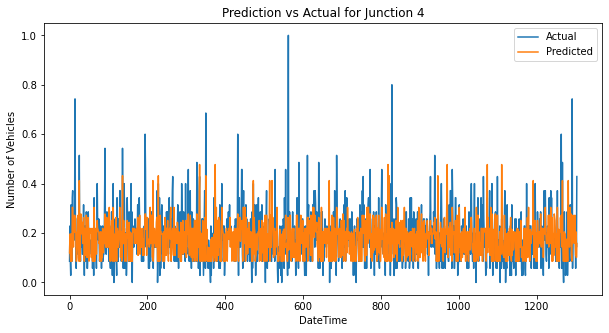

Accuracy score (Junction 4) for the model DecisionTreeRegressor on the train set: 0.49650598007353786
Accuracy score (Junction 4) for the model DecisionTreeRegressor on the test set: 0.42116136931240067
RMSE score (Junction 4) for the model DecisionTreeRegressor on the test set: 0.07954615667377203


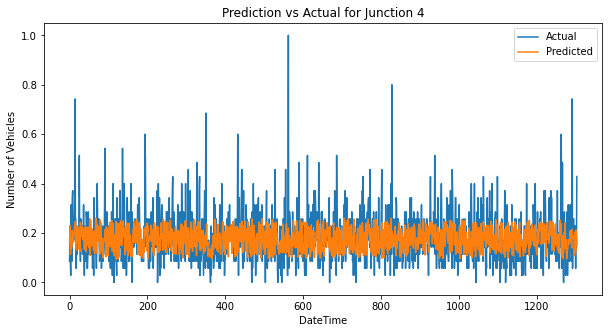

Accuracy score (Junction 4) for the model LinearRegressor on the train set: 0.1997531474009111
Accuracy score (Junction 4) for the model LinearRegressor on the test set: 0.20613186161658426
RMSE score (Junction 4) for the model LinearRegressor on the test set: 0.09315681538721873


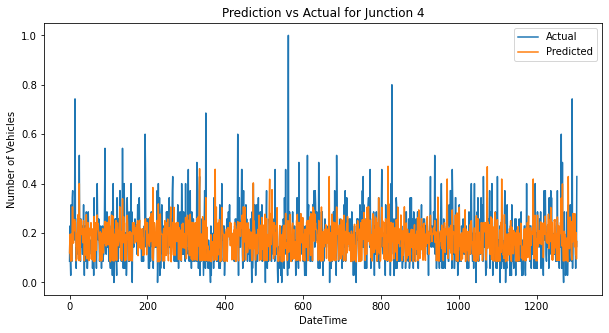

Accuracy score (Junction 4) for the model RandomForestRegressor on the train set: 0.5227131980278017
Accuracy score (Junction 4) for the model RandomForestRegressor on the test set: 0.4327225296336029
RMSE score (Junction 4) for the model RandomForestRegressor on the test set: 0.07874776115521835


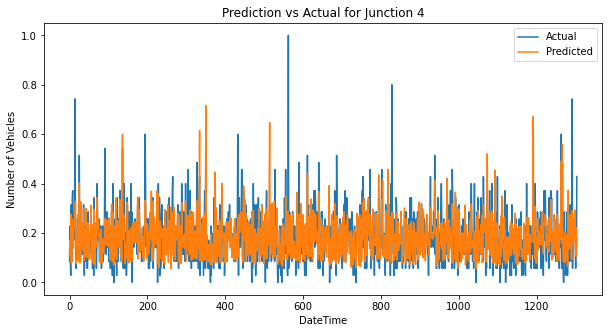

Accuracy score (Junction 4) for the model GridSearchCV(RandomForestRegressor) on the train set: 0.8013349406683473
Accuracy score (Junction 4) for the model GridSearchCV(RandomForestRegressor) on the test set: 0.490958326731349
RMSE score (Junction 4) for the model GridSearchCV(RandomForestRegressor) on the test set: 0.07459627072382435


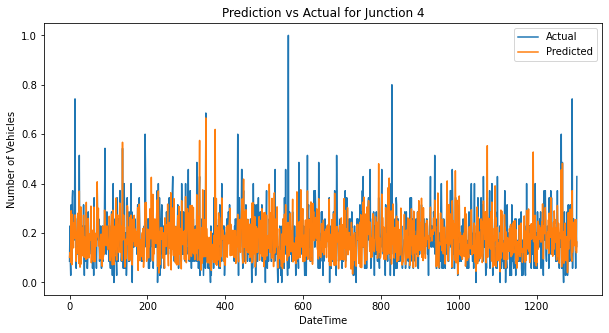

Accuracy score (Junction 4) for the model xgb.XGBRegressor on the train set: 0.7958672777364995
Accuracy score (Junction 4) for the model xgb.XGBRegressor on the test set: 0.4883433715160236
RMSE score (Junction 4) for the model xgb.XGBRegressor on the test set: 0.0747876264070833


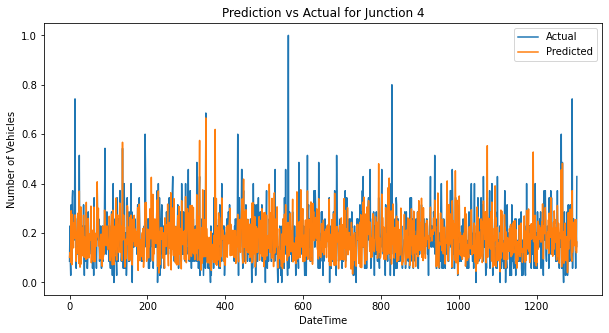

Accuracy score (Junction 4) for the model GridSearchCV(xgboost) on the train set: 0.7958672777364995
Accuracy score (Junction 4) for the model GridSearchCV(xgboost) on the test set: 0.4883433715160236
RMSE score (Junction 4) for the model GridSearchCV(xgboost) on the test set: 0.0747876264070833


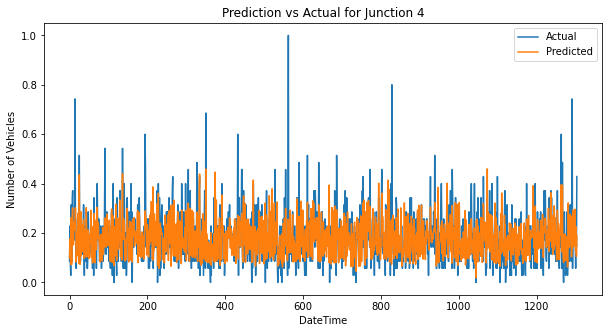

Accuracy score (Junction 4) for the model lgb.LGBMRegressor on the train set: 0.6562091981508588
Accuracy score (Junction 4) for the model lgb.LGBMRegressor on the test set: 0.5146917098223409
RMSE score (Junction 4) for the model lgb.LGBMRegressor on the test set: 0.07283653925095472


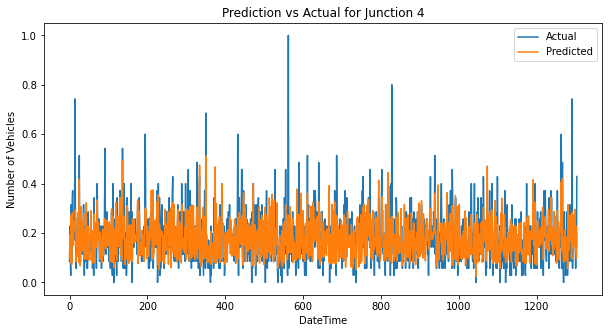

Accuracy score (Junction 4) for the model GridSearchCV(lightgbm) on the train set: 0.7009171982881327
Accuracy score (Junction 4) for the model GridSearchCV(lightgbm) on the test set: 0.5237397514165021
RMSE score (Junction 4) for the model GridSearchCV(lightgbm) on the test set: 0.07215436594321141


In [174]:
models_used_Junctions_4 = []
scores_train_Junctions_4 = []
scores_test_Junctions_4 = []
rmse_Junctions_4 = []

for i in range(len(models)):
    models[i].fit(X_trains[3], y_trains[3])
    preds_test = models[i].predict(X_tests[3])
    preds_complete = models[i].predict(X4)
    plot_prediction_vs_datetime(X_tests[3], preds_test, y_tests[3], 'Prediction vs Actual for Junction 4')
    train_score = models[i].score(X_trains[3], y_trains[3])
    test_score = models[i].score(X_tests[3], y_tests[3])
    print(f"Accuracy score (Junction 4) for the model {models_short[i]} on the train set: {train_score}")
    print(f"Accuracy score (Junction 4) for the model {models_short[i]} on the test set: {test_score}")
    print(f"RMSE score (Junction 4) for the model {models_short[i]} on the test set: {mean_squared_error(y_tests[3], preds_test)**(1/2)}")
    models_used_Junctions_4.append(models[i])
    scores_train_Junctions_4.append(train_score)
    scores_test_Junctions_4.append(test_score)
    rmse_Junctions_4.append(mean_squared_error(y_tests[3], preds_test)**0.5)

In [175]:
print("FOR JUNCTION 4\n")
for i in range(len(models_short)):
    print(f"{models_short[i]}\n   Train Score: {scores_train_Junctions_4[i]} - Test Score: {scores_test_Junctions_4[i]} - RMSE: {rmse_Junctions_4[i]}\n")

FOR JUNCTION 4

DecisionTreeRegressor
   Train Score: 0.49650598007353786 - Test Score: 0.42116136931240067 - RMSE: 0.07954615667377203

LinearRegressor
   Train Score: 0.1997531474009111 - Test Score: 0.20613186161658426 - RMSE: 0.09315681538721873

RandomForestRegressor
   Train Score: 0.5227131980278017 - Test Score: 0.4327225296336029 - RMSE: 0.07874776115521835

GridSearchCV(RandomForestRegressor)
   Train Score: 0.8013349406683473 - Test Score: 0.490958326731349 - RMSE: 0.07459627072382435

xgb.XGBRegressor
   Train Score: 0.7958672777364995 - Test Score: 0.4883433715160236 - RMSE: 0.0747876264070833

GridSearchCV(xgboost)
   Train Score: 0.7958672777364995 - Test Score: 0.4883433715160236 - RMSE: 0.0747876264070833

lgb.LGBMRegressor
   Train Score: 0.6562091981508588 - Test Score: 0.5146917098223409 - RMSE: 0.07283653925095472

GridSearchCV(lightgbm)
   Train Score: 0.7009171982881327 - Test Score: 0.5237397514165021 - RMSE: 0.07215436594321141



In [36]:
final_models = {"Junction 1": models[7], "Junction 2": models[7], "Junction 3": models[3], "Junction 4": models[7]}

In [37]:
final_model_1 = final_models["Junction 1"]
final_model_2 = final_models["Junction 2"]
final_model_3 = final_models["Junction 3"]
final_model_4 = final_models["Junction 4"]

In [42]:
final_model_1.fit(X_trains[0], y_trains[0]) # For Junction 1

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [43]:
final_model_2.fit(X_trains[1], y_trains[1]) # For Junction 2

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [38]:
final_model_3.fit(X_trains[2], y_trains[2]) # For Junction 3

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [44]:
final_model_4.fit(X_trains[3], y_trains[3]) # For Junction 4

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [39]:
import pickle

In [45]:
data1 = {"model" : final_model_1, "le_day" : encoded_values}
data2 = {"model" : final_model_2, "le_day" : encoded_values}
data3 = {"model" : final_model_3, "le_day" : encoded_values}
data4 = {"model" : final_model_4, "le_day" : encoded_values}

In [46]:
with open('final_model_1.pkl', 'wb') as f1:
    pickle.dump(data1, f1)

with open('final_model_2.pkl', 'wb') as f2:
    pickle.dump(data2, f2)

with open('final_model_3.pkl', 'wb') as f3:
    pickle.dump(data3, f3)

with open('final_model_4.pkl', 'wb') as f4:
    pickle.dump(data4, f4)